In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Banking Sector

In [ ]:
Bank = pd.read_csv("Bank Stocks Data.csv")

In [ ]:
Bank.head()

Date    SBIN    HDFC    ICICI    Kotak    Axis
0  01-01-2019  299.60  1074.05  363.75  1250.45  627.30
1  02-01-2019  293.90  1064.25  364.60  1240.60  620.05
2  03-01-2019  291.10  1055.90  363.25  1235.25  607.95
3  04-01-2019  297.65  1058.72  365.20  1247.95  619.60
4  07-01-2019  296.30  1060.33  367.70  1246.60  637.45

***The data is over the period January 01, 2019 to May 09, 2025.***

# Data Preprocessing

## EDA

In [ ]:
Bank.shape

(1565, 6)

In [ ]:
Bank.isnull().sum()

Date     0
SBIN     0
HDFC     0
ICICI    0
Kotak    0
Axis     0
dtype: int64

***No Missing Values***

In [ ]:
Bank.iloc[:,1:].describe()

SBIN        HDFC         ICICI        Kotak         Axis
count  1565.000000  1565.000000  1565.000000  1565.000000  1565.000000
mean    486.883706  1431.651137   762.304153  1714.438403   818.557732
std     197.515073   232.264925   300.977044   221.293023   216.546092
min     150.850000   767.700000   284.000000  1098.250000   303.150000
25%     316.450000  1242.780000   486.350000  1624.300000   693.400000
50%     488.550000  1482.650000   744.600000  1764.600000   762.850000
75%     601.900000  1613.900000   958.000000  1853.850000   987.450000
max     905.650000  1961.700000  1435.500000  2268.800000  1317.300000

In [ ]:
ranges = Bank.iloc[:,1:].apply(lambda x: x.max() - x.min())
print("Stock Ranges:")
print(ranges)

Stock Ranges:
SBIN      754.80
HDFC     1194.00
ICICI    1151.50
Kotak    1170.55
Axis     1014.15
dtype: float64


## Checking Stationarity

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Function to perform ADF test
def check_stationarity(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] < 0.05:
        print("The series is stationary (p-value < 0.05)")
    else:
        print("The series is not stationary (p-value >= 0.05)")

Bank_stocks = Bank.iloc[:,1:]

for column in Bank_stocks.columns:
    print(f"Checking stationarity for {column}:")
    check_stationarity(Bank_stocks[column])
    print("\n" + "-"*50 + "\n")

Checking stationarity for SBIN:
ADF Statistic: -0.5397301134734387
p-value: 0.8840274994426317
The series is not stationary (p-value >= 0.05)

--------------------------------------------------

Checking stationarity for HDFC :
ADF Statistic: -1.569145793789339
p-value: 0.49907149554428615
The series is not stationary (p-value >= 0.05)

--------------------------------------------------

Checking stationarity for ICICI:
ADF Statistic: 0.02396668444881146
p-value: 0.9604698018799878
The series is not stationary (p-value >= 0.05)

--------------------------------------------------

Checking stationarity for Kotak:
ADF Statistic: -2.504386439490906
p-value: 0.11441070136784598
The series is not stationary (p-value >= 0.05)

--------------------------------------------------

Checking stationarity for Axis:
ADF Statistic: -1.1840080317496258
p-value: 0.6804369451912773
The series is not stationary (p-value >= 0.05)

--------------------------------------------------



In [ ]:
# Function to check stationarity
def check_stationarity(series, title=""):
    result = adfuller(series.dropna())
    print(f"{title}ADF Statistic: {result[0]}")
    print(f"{title}p-value: {result[1]}")
    if result[1] < 0.05:
        print(f"{title}The series is stationary (p-value < 0.05)")
    else:
        print(f"{title}The series is not stationary (p-value >= 0.05)")

# First differencing and ADF test
for column in Bank_stocks.columns:
    print(f"\nChecking stationarity after differencing for {column}:")

    diff_series = Bank_stocks[column].diff()  # First-order differencing

    check_stationarity(diff_series, title=f"{column} (Differenced) - ")

    print("-" * 60)


Checking stationarity after differencing for SBIN:
SBIN (Differenced) - ADF Statistic: -41.95561815606505
SBIN (Differenced) - p-value: 0.0
SBIN (Differenced) - The series is stationary (p-value < 0.05)
------------------------------------------------------------

Checking stationarity after differencing for HDFC :
HDFC  (Differenced) - ADF Statistic: -14.77842860514279
HDFC  (Differenced) - p-value: 2.2651291164685704e-27
HDFC  (Differenced) - The series is stationary (p-value < 0.05)
------------------------------------------------------------

Checking stationarity after differencing for ICICI:
ICICI (Differenced) - ADF Statistic: -16.528548536109916
ICICI (Differenced) - p-value: 2.0335095517679805e-29
ICICI (Differenced) - The series is stationary (p-value < 0.05)
------------------------------------------------------------

Checking stationarity after differencing for Kotak:
Kotak (Differenced) - ADF Statistic: -17.328357303114544
Kotak (Differenced) - p-value: 5.428857524186583

## Decomposition of time series


Decomposing SBIN...


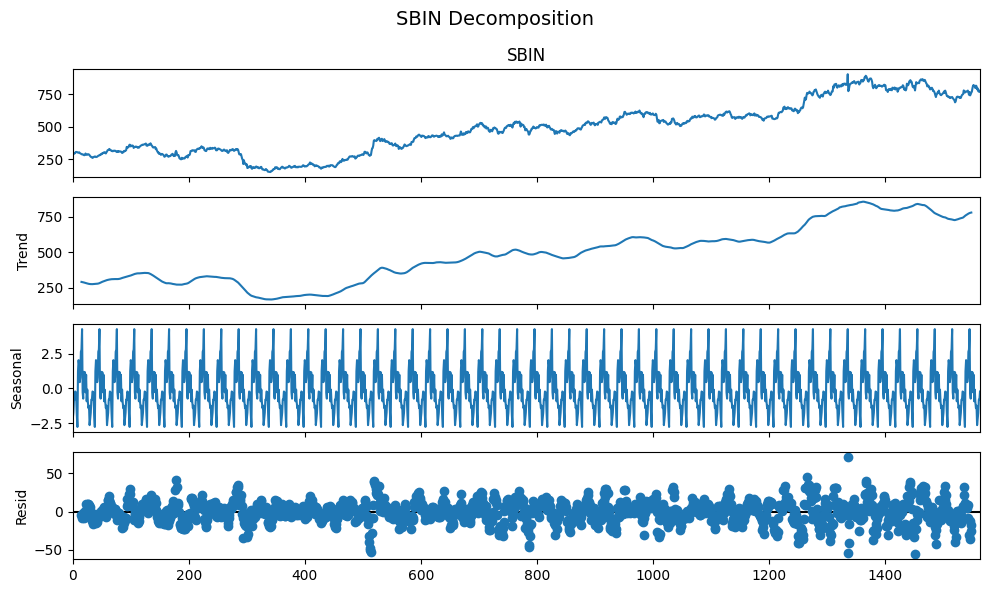


Decomposing HDFC ...


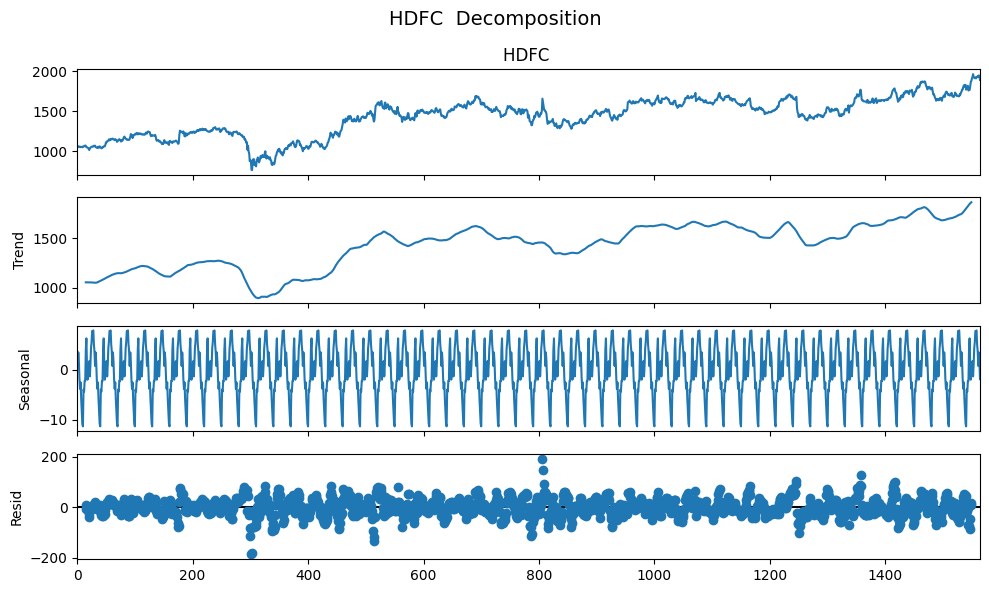


Decomposing ICICI...


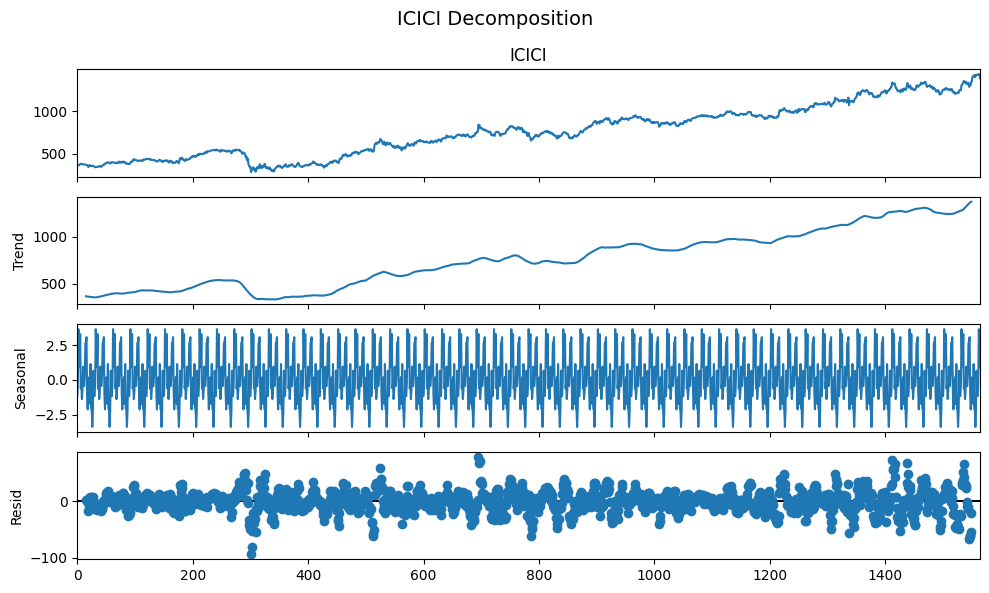


Decomposing Kotak...


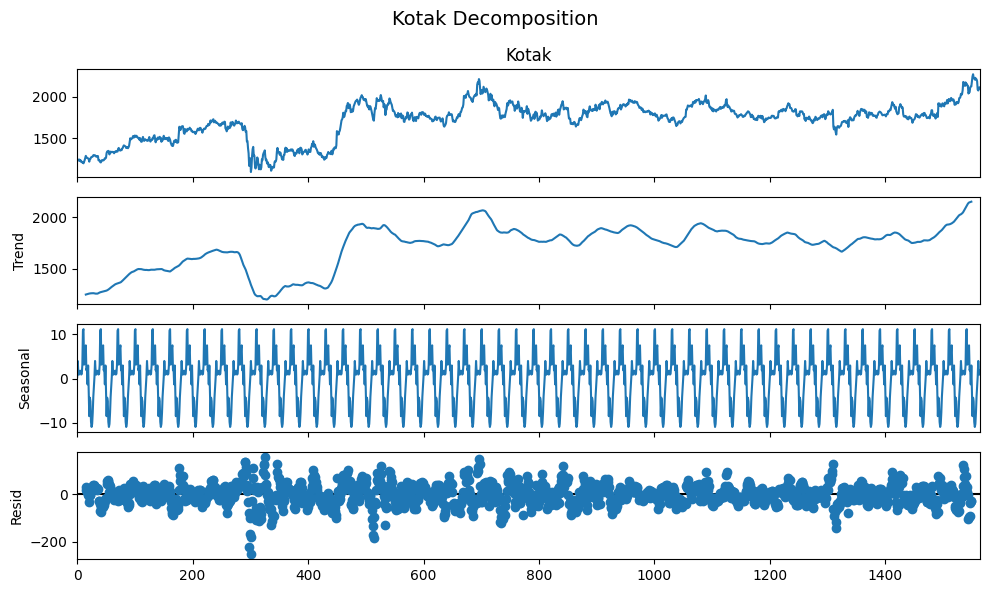


Decomposing Axis...


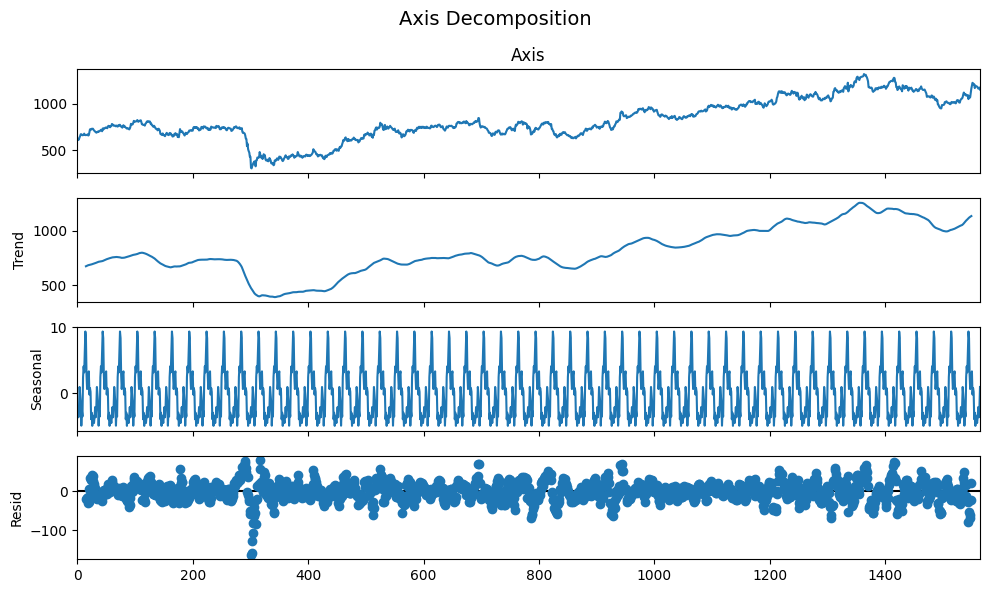

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Decompose each bank's stock time series
for column in Bank_stocks.columns:
    print(f"\nDecomposing {column}...")

    series = Bank_stocks[column].dropna()

    # Perform decomposition (you can change model to 'multiplicative' if needed)
    decomposition = seasonal_decompose(series, model='additive', period=30)  # Assuming ~monthly seasonality

    # Plot the decomposition
    fig = decomposition.plot()
    fig.set_size_inches(10, 6)
    fig.suptitle(f"{column} Decomposition", fontsize=14)
    plt.tight_layout()
    plt.show()


Decomposing differenced series for SBIN...


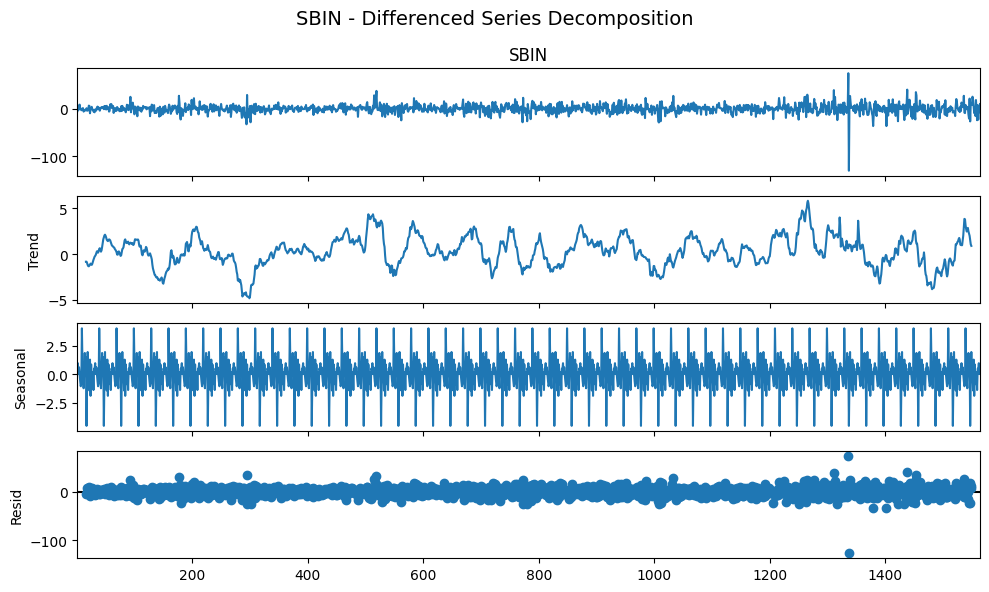


Decomposing differenced series for HDFC ...


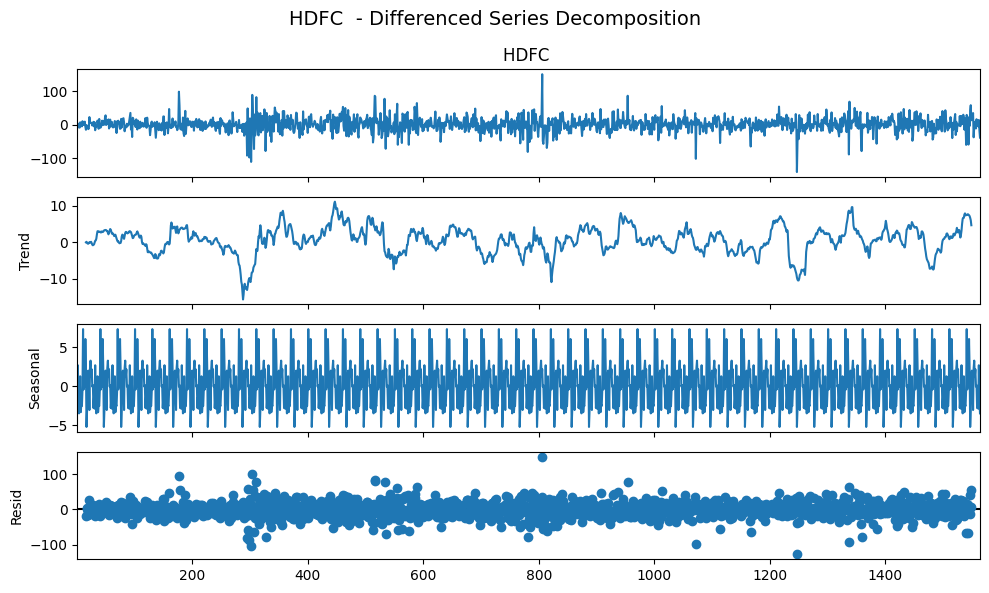


Decomposing differenced series for ICICI...


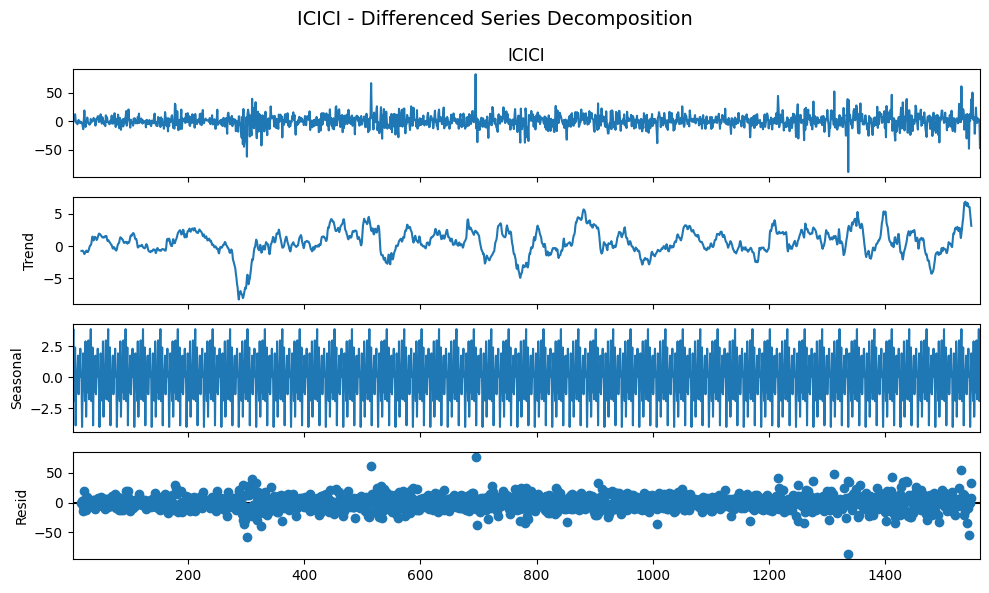


Decomposing differenced series for Kotak...


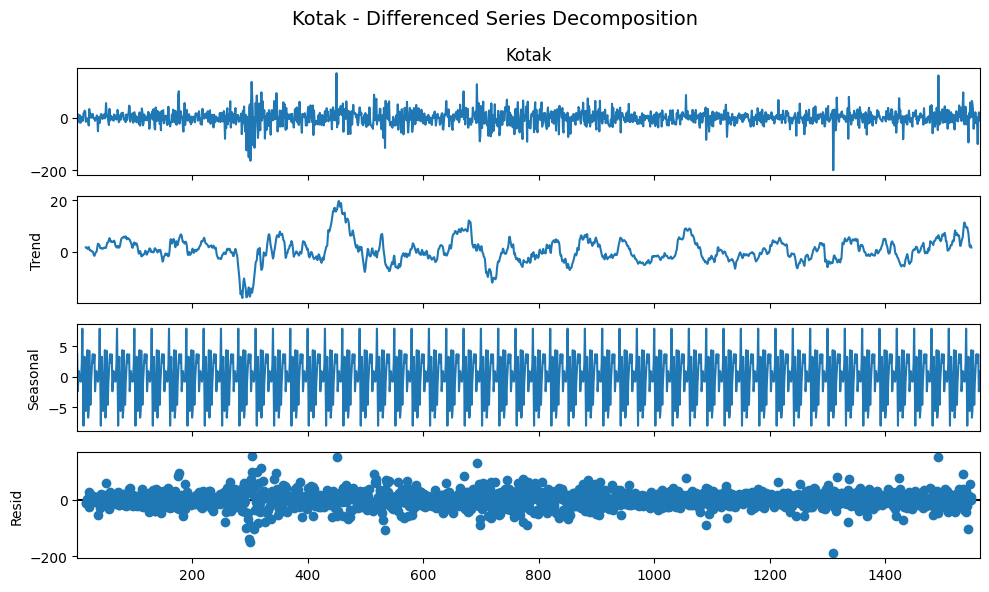


Decomposing differenced series for Axis...


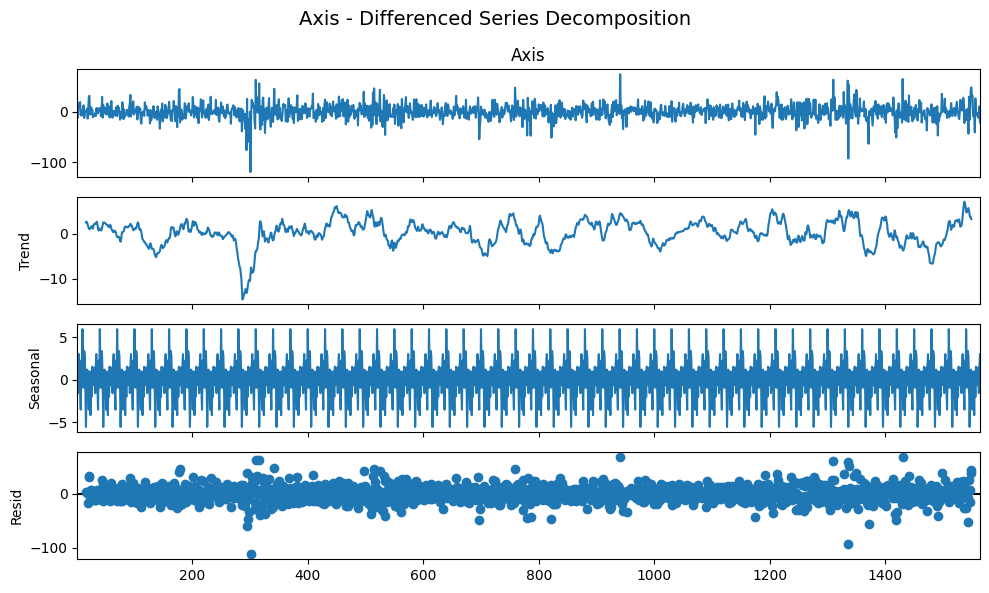

In [ ]:
for column in Bank_stocks.columns:
    print(f"\nDecomposing differenced series for {column}...")

    # First-order differencing
    diff_series = Bank_stocks[column].diff().dropna()

    # Decomposition (adjust 'period' based on your data frequency)
    decomposition = seasonal_decompose(diff_series, model='additive', period=30)

    # Plot the decomposition
    fig = decomposition.plot()
    fig.set_size_inches(10, 6)
    fig.suptitle(f"{column} - Differenced Series Decomposition", fontsize=14)
    plt.tight_layout()
    plt.show()


***We can notice seasonality in the differenced data.***

## Train-Test split

In [ ]:
# Convert 'Date' column to datetime with day first
Bank['Date'] = pd.to_datetime(Bank['Date'], dayfirst=True)
Bank.set_index('Date', inplace=True)

# Create train-test split from Dec 1, 2024
test_start_date = '2024-12-01'
train_Bank = Bank[Bank.index < test_start_date]
test_Bank = Bank[Bank.index >= test_start_date]

# Print shapes
print("Train set shape:", train_Bank.shape)
print("Test set shape:", test_Bank.shape)

Train set shape: (1459, 5)
Test set shape: (106, 5)


## ACF-PACF Plots

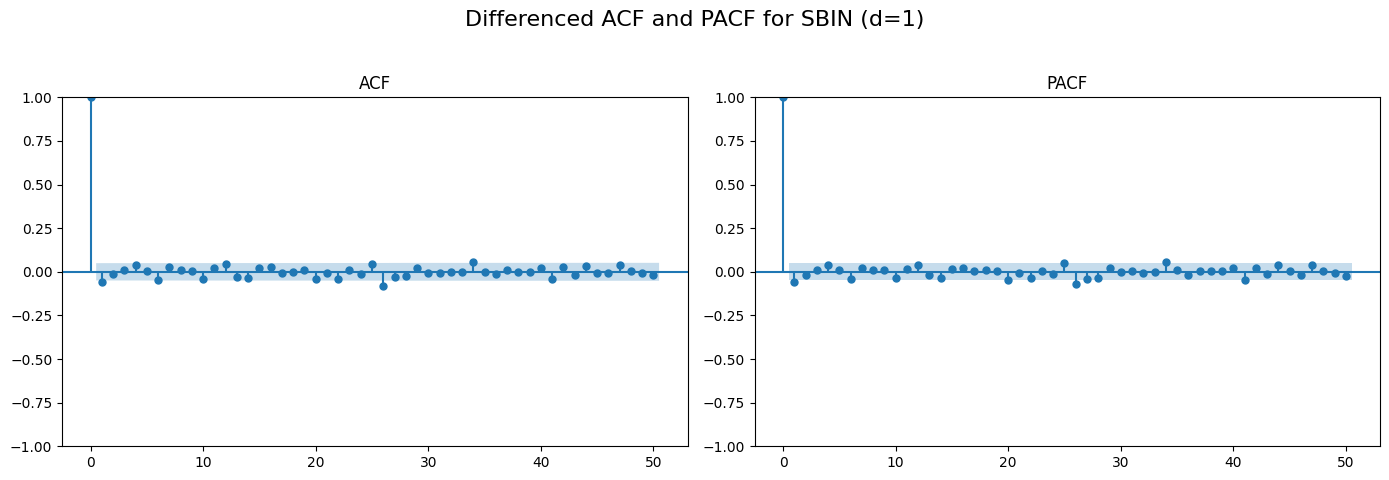

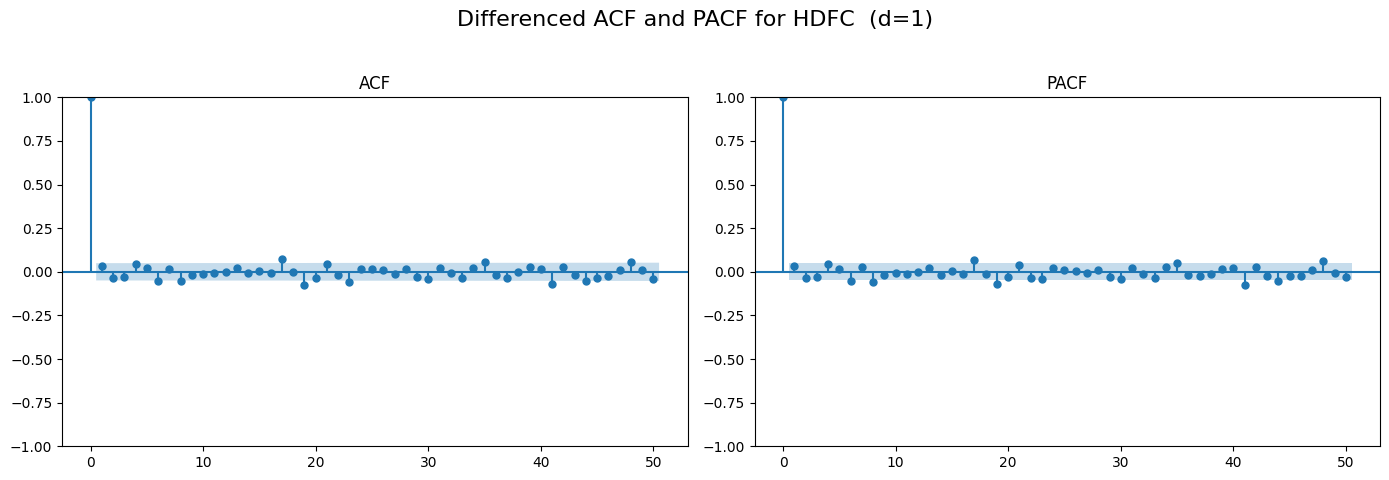

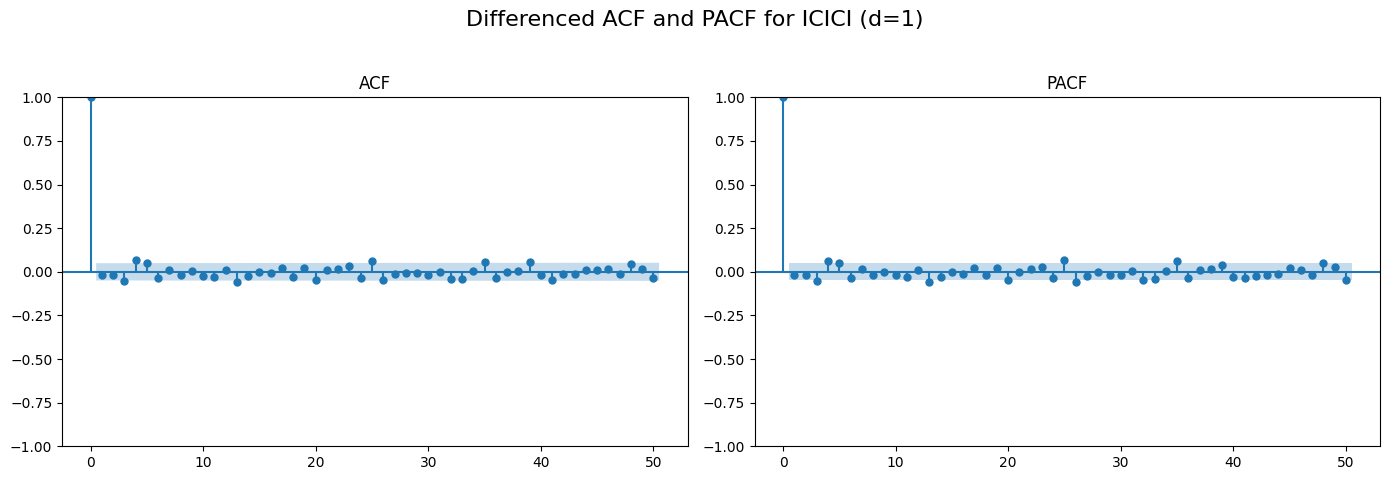

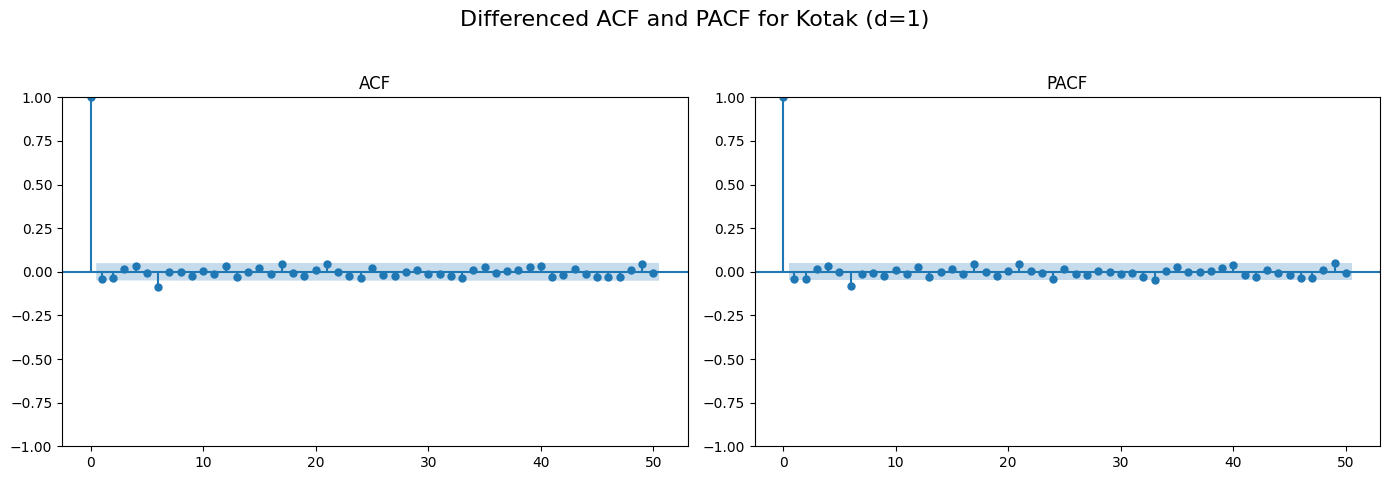

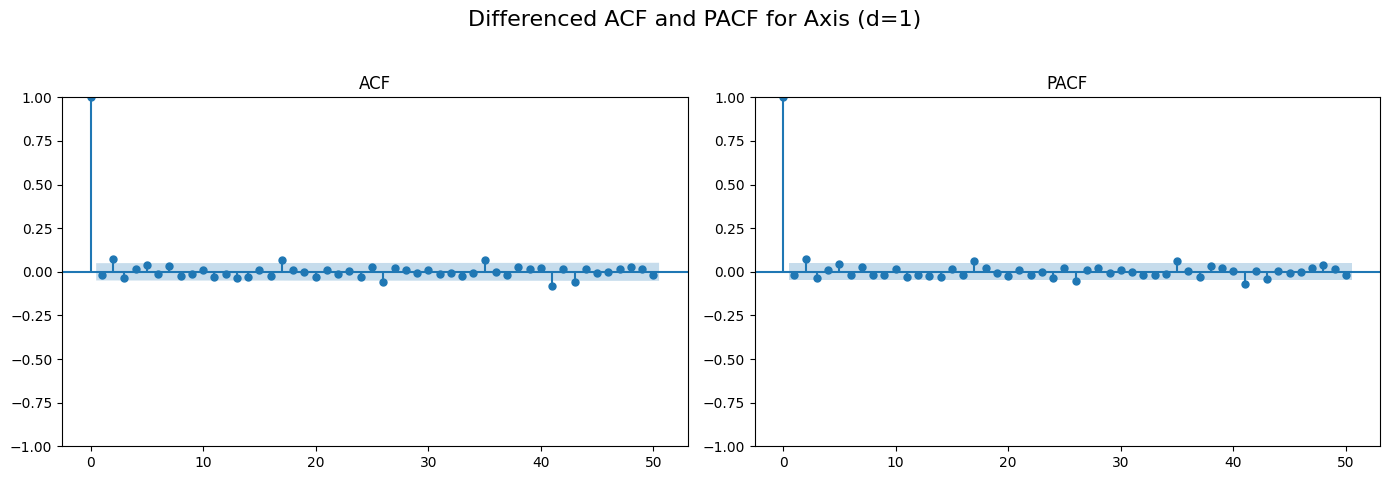

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Parameters for SARIMA
d = 1        # Regular differencing

for stock in Bank_stocks.columns:
    series = Bank_stocks[stock]  # Use Bank_stocks DataFrame

    # Apply combined differencing: first regular, then seasonal
    diff_series = series.diff().dropna()

    # Plot ACF and PACF
    plt.figure(figsize=(14, 5))
    plt.suptitle(f'Differenced ACF and PACF for {stock} (d=1)', fontsize=16)

    plt.subplot(1, 2, 1)
    plot_acf(diff_series, lags=50, ax=plt.gca())
    plt.title('ACF')

    plt.subplot(1, 2, 2)
    plot_pacf(diff_series, lags=50, ax=plt.gca(), method='ywm')
    plt.title('PACF')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

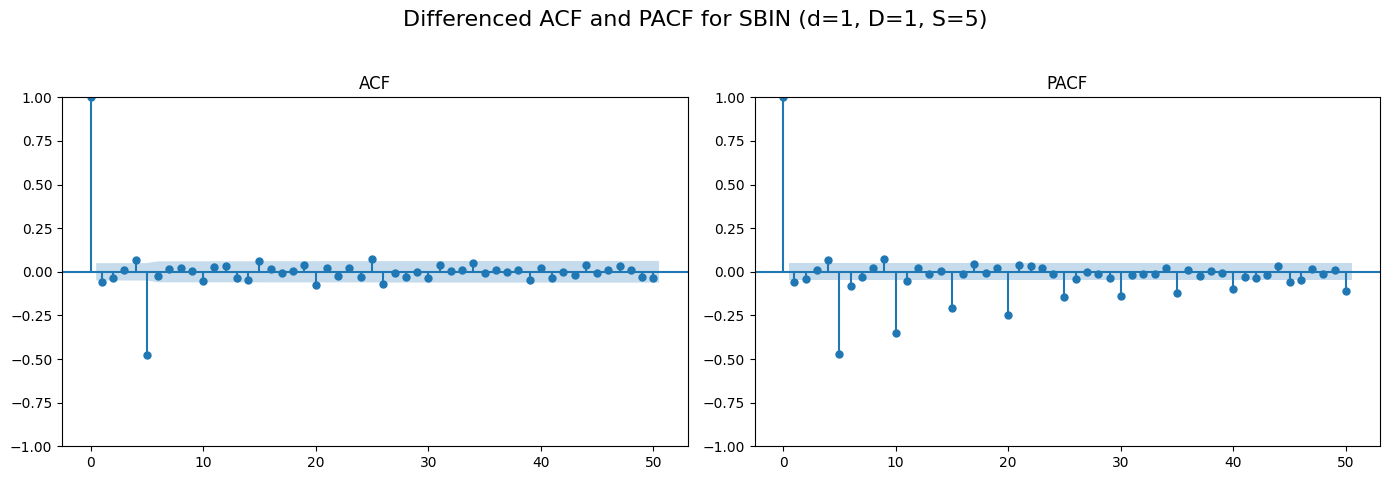

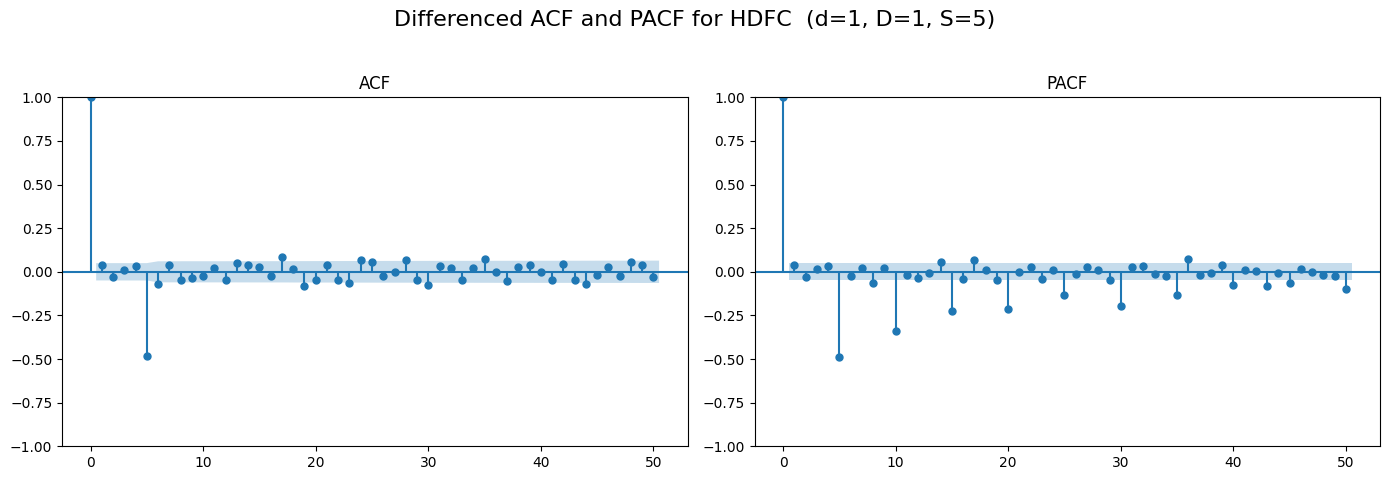

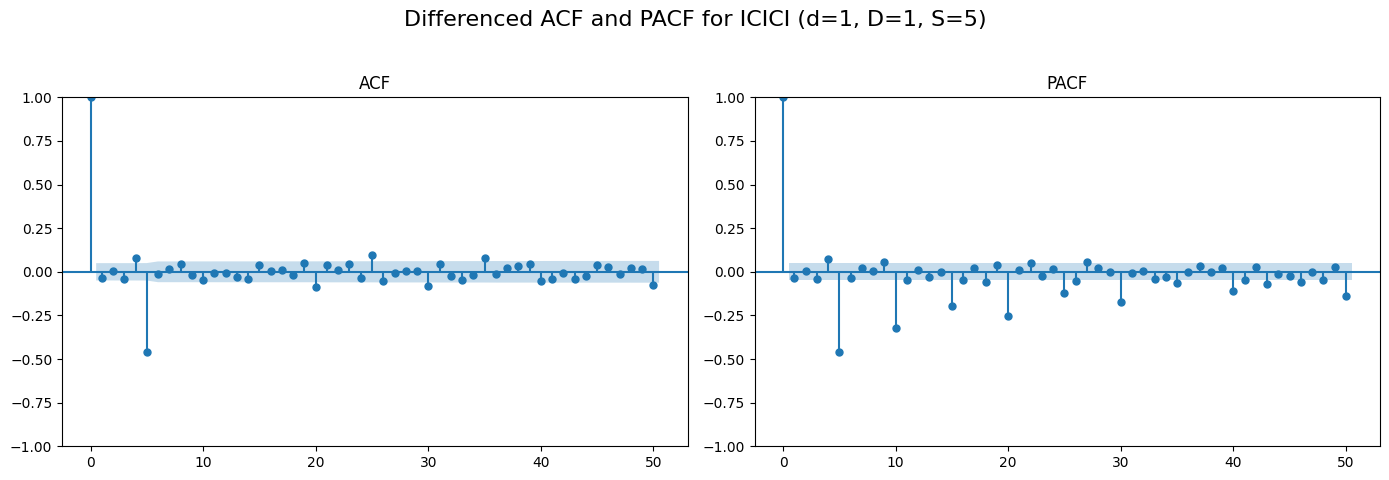

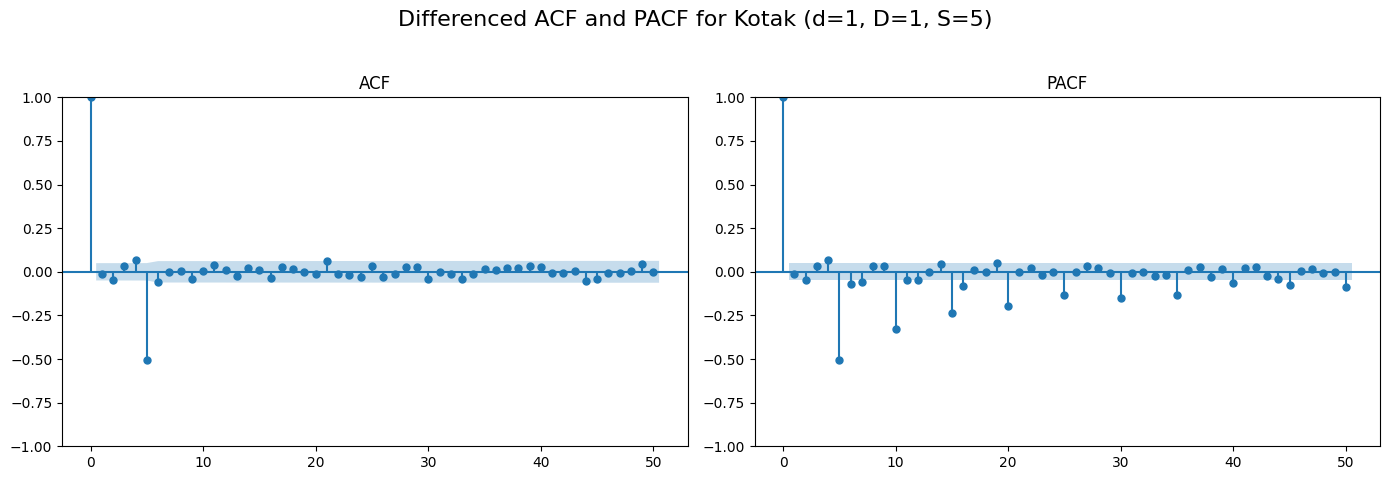

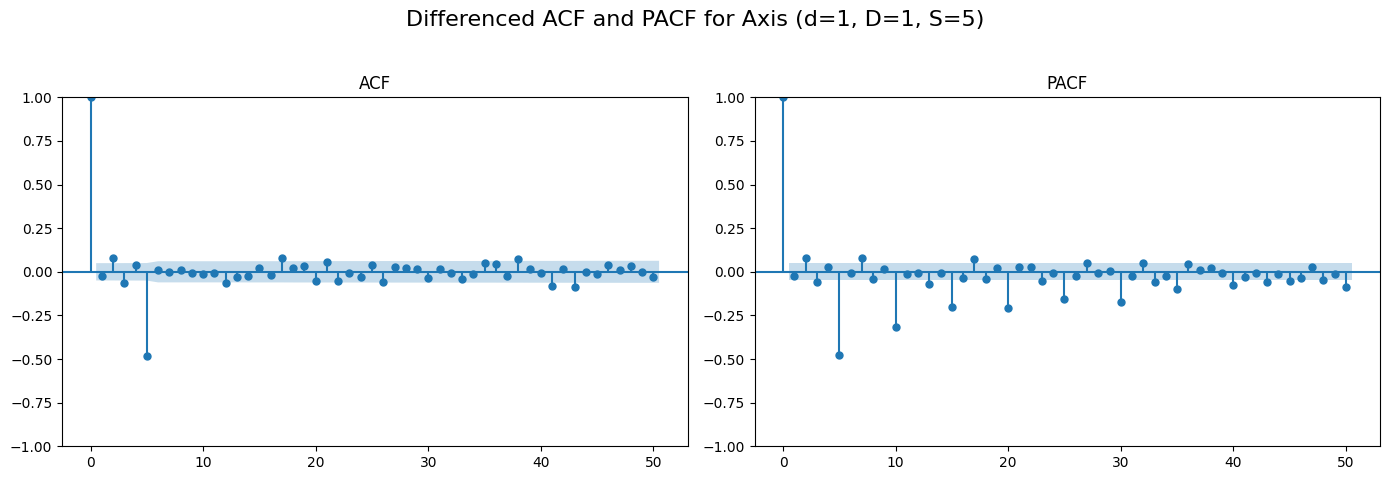

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Parameters for SARIMA
d = 1        # Regular differencing
D = 1        # Seasonal differencing
S = 5        # 5-day seasonality for trading week

for stock in Bank_stocks.columns:
    series = Bank_stocks[stock]  # Use Bank_stocks DataFrame

    # Apply combined differencing: first regular, then seasonal
    diff_series = series.diff().diff(S).dropna()

    # Plot ACF and PACF
    plt.figure(figsize=(14, 5))
    plt.suptitle(f'Differenced ACF and PACF for {stock} (d=1, D=1, S=5)', fontsize=16)

    plt.subplot(1, 2, 1)
    plot_acf(diff_series, lags=50, ax=plt.gca())
    plt.title('ACF')

    plt.subplot(1, 2, 2)
    plot_pacf(diff_series, lags=50, ax=plt.gca(), method='ywm')
    plt.title('PACF')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# ARIMA model

In [ ]:
import numpy as np
import pandas as pd
import warnings
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Define order ranges to try
p_values = [0, 1]
d_values = [1]
q_values = [0, 1]

best_arima_orders = {}

for stock in train_Bank.columns:
    print(f"\n🔍 Finding best ARIMA order for {stock}:")

    train_series = train_Bank[stock].dropna()
    test_series = test_Bank[stock].dropna()

    best_aic = float('inf')
    best_order = None
    best_model = None

    # Grid search for best (p,d,q)
    for p in p_values:
        for d in d_values:
            for q in q_values:
                try:
                    with warnings.catch_warnings():
                        warnings.filterwarnings("ignore")
                        model = ARIMA(train_series, order=(p, d, q))
                        result = model.fit()
                        if result.aic < best_aic:
                            best_aic = result.aic
                            best_order = (p, d, q)
                            best_model = result
                except:
                    continue

    # Forecast and evaluate
    forecast = best_model.forecast(steps=len(test_series))
    forecast = forecast[:len(test_series)]  # Ensure lengths match

    rmse = np.sqrt(mean_squared_error(test_series, forecast))
    mape = mean_absolute_percentage_error(test_series, forecast) * 100

    # Store all results
    best_arima_orders[stock] = {
        'best_order': best_order,
        'best_aic': best_aic,
        'rmse': rmse,
        'mape': mape,
        'forecast': forecast
    }

    print(f"✅ {stock}: Best Order = {best_order}, AIC = {best_aic:.2f}, RMSE = {rmse:.2f}, MAPE = {mape:.2f}%")



🔍 Finding best ARIMA order for SBIN:


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


✅ SBIN: Best Order = (0, 1, 1), AIC = 10628.78, RMSE = 78.59, MAPE = 9.33%

🔍 Finding best ARIMA order for HDFC :


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


✅ HDFC : Best Order = (0, 1, 1), AIC = 13097.57, RMSE = 93.39, MAPE = 4.59%

🔍 Finding best ARIMA order for ICICI:


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


✅ ICICI: Best Order = (0, 1, 0), AIC = 11305.60, RMSE = 64.36, MAPE = 4.10%

🔍 Finding best ARIMA order for Kotak:


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


✅ Kotak: Best Order = (0, 1, 0), AIC = 13924.85, RMSE = 246.88, MAPE = 9.55%

🔍 Finding best ARIMA order for Axis:
✅ Axis: Best Order = (1, 1, 1), AIC = 11966.04, RMSE = 95.82, MAPE = 8.03%


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


# SARIMA model

In [ ]:
Bank = Bank.asfreq('B')

In [ ]:
print(Bank.index)
print(Bank.index.freq)

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-07', '2019-01-08', '2019-01-09', '2019-01-10',
               '2019-01-11', '2019-01-14',
               ...
               '2025-04-28', '2025-04-29', '2025-04-30', '2025-05-01',
               '2025-05-02', '2025-05-05', '2025-05-06', '2025-05-07',
               '2025-05-08', '2025-05-09'],
              dtype='datetime64[ns]', name='Date', length=1659, freq='B')
<BusinessDay>


Best model for SBIN:
Order: (0, 1, 1), Seasonal Order: (6, 1, 1, 5), AIC: 12033.792022247042


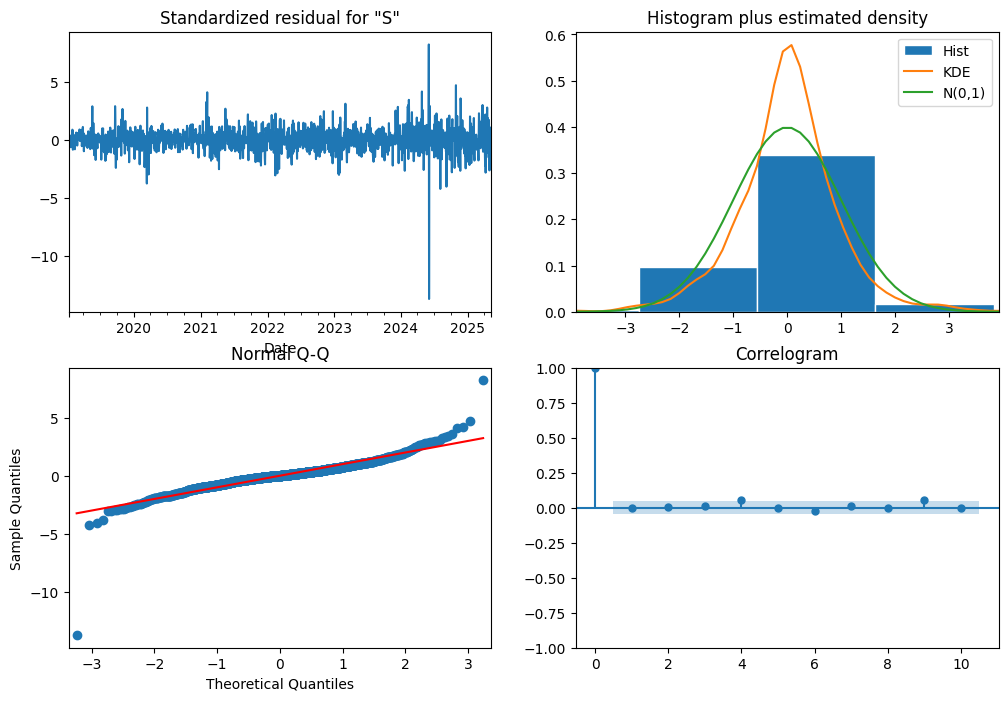

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Best model for HDFC :
Order: (0, 1, 1), Seasonal Order: (6, 1, 1, 5), AIC: 14785.835816758106


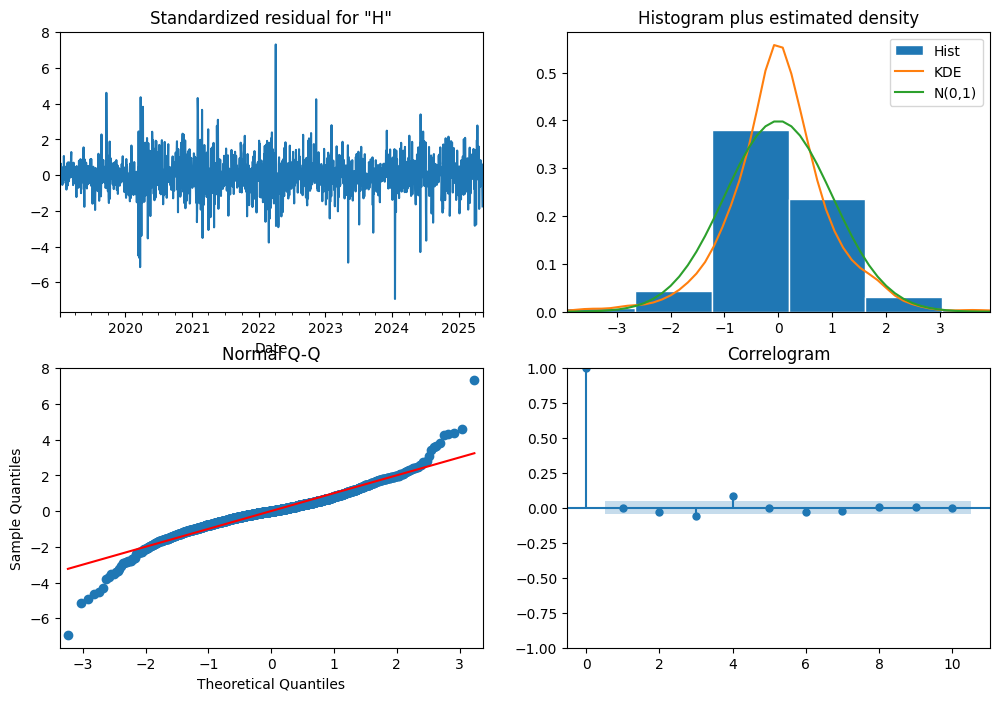

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels

Best model for ICICI:
Order: (1, 1, 1), Seasonal Order: (6, 1, 1, 5), AIC: 12827.29191579744


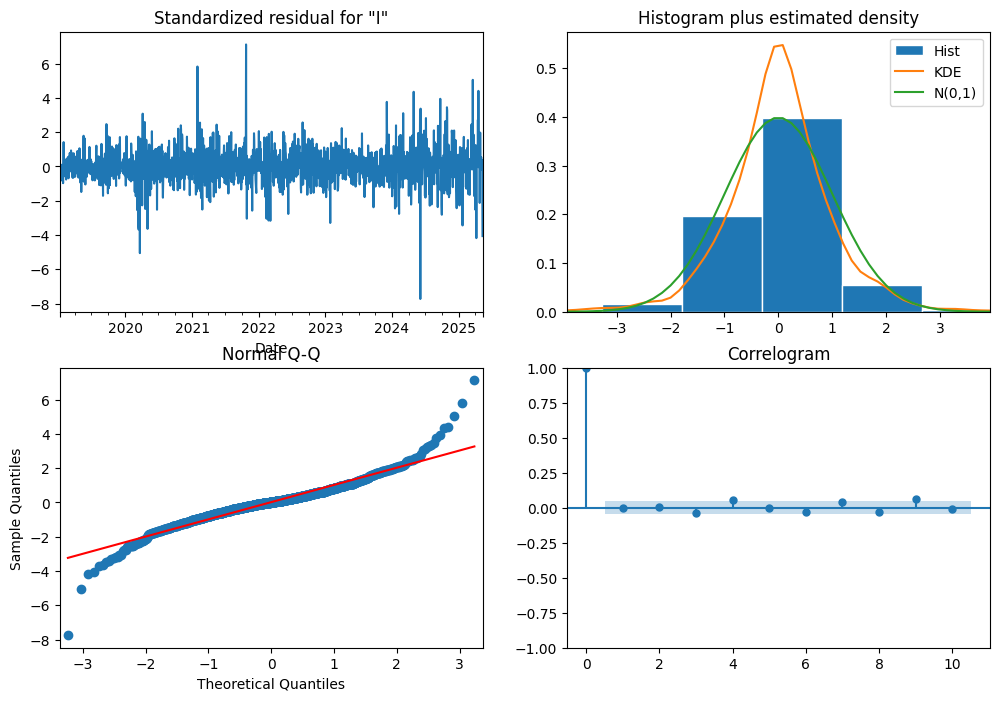

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Best model for Kotak:
Order: (0, 1, 1), Seasonal Order: (6, 1, 1, 5), AIC: 15753.066891398474


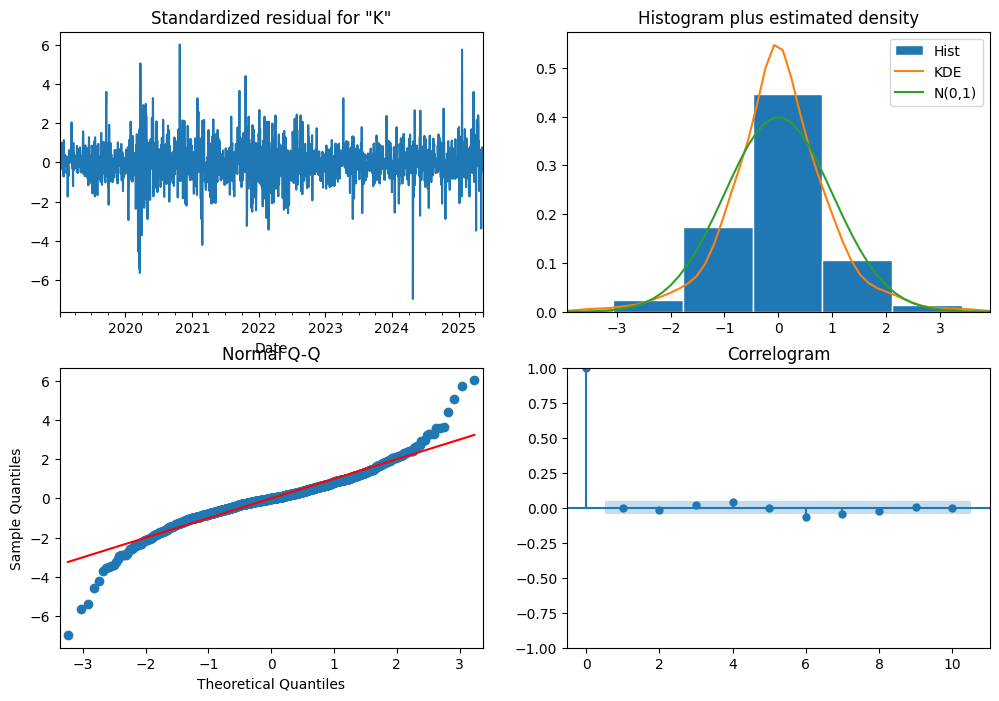

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Best model for Axis:
Order: (1, 1, 1), Seasonal Order: (6, 1, 1, 5), AIC: 13537.636850250248


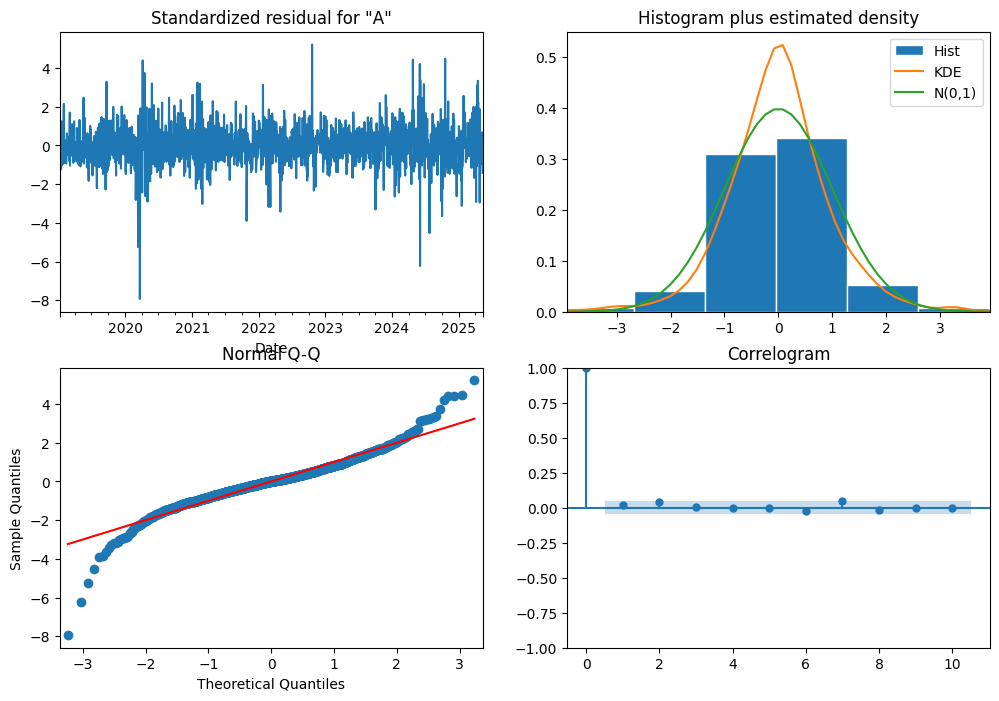

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Parameters
d = 1      # Regular differencing
D = 1      # Seasonal differencing
S = 5      # 5-day seasonality for trading week
q = 1
Q = 1
p_range = [0, 1]
P_range = [6, 7, 8]

# Store results for AIC comparison
best_models = {}

# Loop through each stock column in Bank
for stock in Bank.columns:
    series = Bank[stock]

    # Apply combined differencing
    diff_series = series.dropna()

    #Reset the frequency to 'B' (business days) if it was lost during differencing
    diff_series = diff_series.asfreq('B', method='pad')

    # Initialize best model variables
    best_aic = float('inf')
    best_order = None
    best_seasonal_order = None
    best_model = None

    # Try combinations of (p, q, P, Q)
    for p in p_range:
        for P in P_range:
            try:
                # Fit SARIMAX model with current order and seasonal order
                model = SARIMAX(diff_series, order=(p, d, q), seasonal_order=(P, D, Q, S),freq = 'B')
                result = model.fit(disp=False)

                # Check if current model has a better AIC
                if result.aic < best_aic:
                    best_aic = result.aic
                    best_order = (p, d, q)
                    best_seasonal_order = (P, D, Q, S)
                    best_model = result
            except Exception as e:
                print(f"Error fitting model for {stock} with p={p}, P={P}: {e}")
                continue

    # Save the best model info for the stock
    best_models[stock] = {
        'best_order': best_order,
        'best_seasonal_order': best_seasonal_order,
        'best_aic': best_aic,
        'best_model': best_model
    }

    # Print and plot diagnostics for the best model
    print(f"Best model for {stock}:")
    print(f"Order: {best_order}, Seasonal Order: {best_seasonal_order}, AIC: {best_aic}")

    # Plot diagnostics for the best model
    best_model.plot_diagnostics(figsize=(12, 8))
    plt.show()

In [ ]:
best_models

{'SBIN': {'best_order': (0, 1, 1),
  'best_seasonal_order': (6, 1, 1, 5),
  'best_aic': np.float64(12033.792022247042),
  'best_model': <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper at 0x7e75fdd17bd0>},
 'HDFC ': {'best_order': (0, 1, 1),
  'best_seasonal_order': (6, 1, 1, 5),
  'best_aic': np.float64(14785.835816758106),
  'best_model': <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper at 0x7e75fe01db10>},
 'ICICI': {'best_order': (1, 1, 1),
  'best_seasonal_order': (6, 1, 1, 5),
  'best_aic': np.float64(12827.29191579744),
  'best_model': <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper at 0x7e75fdc65350>},
 'Kotak': {'best_order': (0, 1, 1),
  'best_seasonal_order': (6, 1, 1, 5),
  'best_aic': np.float64(15753.066891398474),
  'best_model': <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper at 0x7e75ff38e890>},
 'Axis': {'best_order': (1, 1, 1),
  'best_seasonal_order': (6, 1, 1, 5),
  'best_aic': np.float64(13537.636850250248),
  'best_model': <s

Processing stock: SBIN


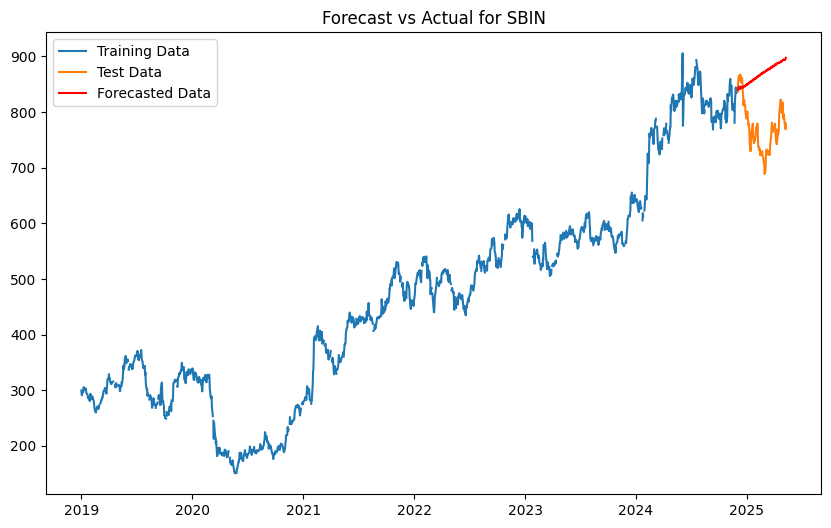

Processing stock: HDFC 


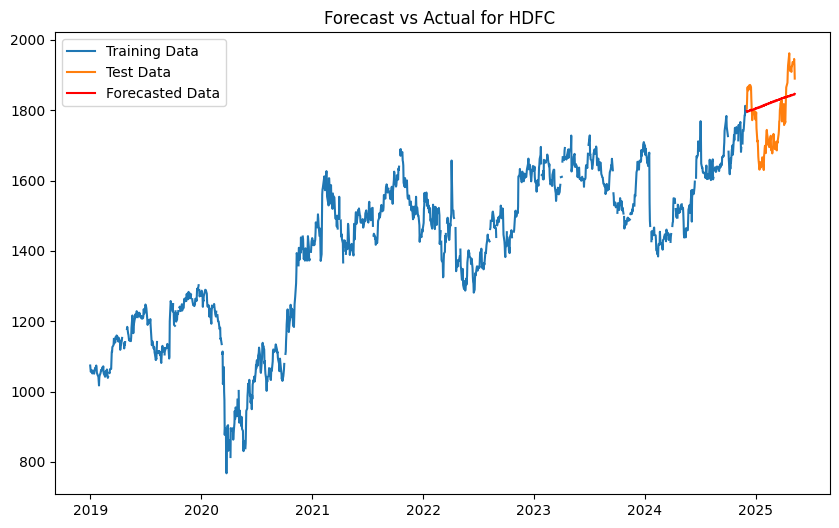

Processing stock: ICICI


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


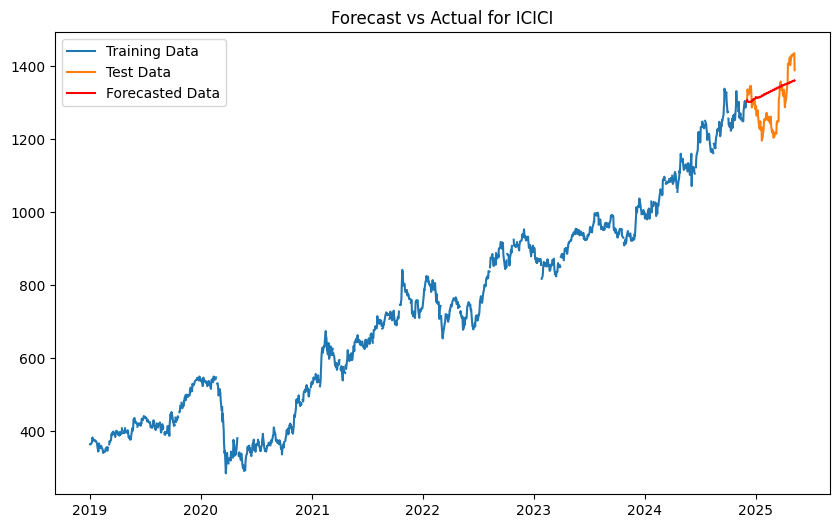

Processing stock: Kotak


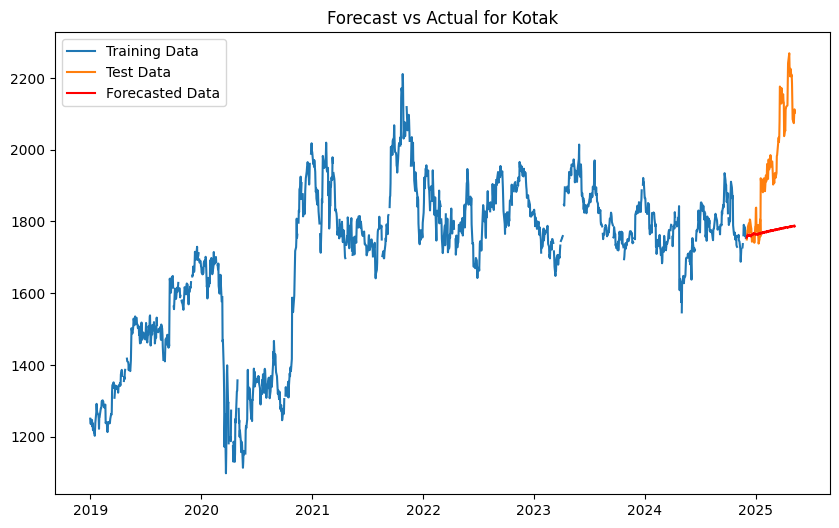

Processing stock: Axis


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


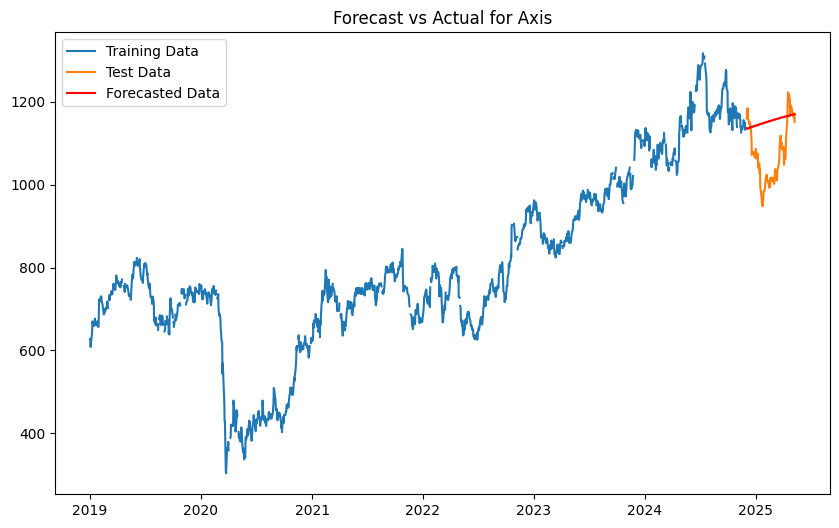


RMSE for all stocks:
SBIN: 107.51879140380532
HDFC : 99.00627510007168
ICICI: 67.77881136024023
Kotak: 226.80590658785775
Axis: 106.09998618814375

MAPE for all stocks:
SBIN: 0.12950139201714114
HDFC : 0.04985021675714468
ICICI: 0.044969864380395366
Kotak: 0.0869951791811406
Axis: 0.08778430010051988


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt

# Store RMSE and MAPE values for each stock
rmse_results = {}
mape_results = {}

# Loop through each stock in train_Bank and test_Bank
for stock in train_Bank.columns:
    print(f"Processing stock: {stock}")

    # Get the best parameters for the current stock
    best_order = best_models[stock]['best_order']
    best_seasonal_order = best_models[stock]['best_seasonal_order']

    # Train data for current stock
    train_data = train_Bank[stock]
    test_data = test_Bank[stock]
    train_data = train_data.asfreq('B')  # Set frequency to business days

    # Fit the SARIMAX model to the training data
    model = SARIMAX(train_data,
                    order=best_order,
                    seasonal_order=best_seasonal_order,
                    freq='B')  # 'B' for business days
    result = model.fit(disp=False)

    # Forecast on the test data
    forecast_steps = len(test_data)
    forecast = result.get_forecast(steps=forecast_steps)
    forecast_mean = forecast.predicted_mean

    # Calculate RMSE (Root Mean Squared Error)
    rmse = np.sqrt(mean_squared_error(test_data, forecast_mean))
    rmse_results[stock] = rmse

    # Calculate MAPE (Mean Absolute Percentage Error)
    mape = mean_absolute_percentage_error(test_data, forecast_mean)
    mape_results[stock] = mape

    # Plot the forecasted values along with the actual test data
    plt.figure(figsize=(10, 6))
    plt.plot(train_data.index, train_data, label='Training Data')
    plt.plot(test_data.index, test_data, label='Test Data')
    plt.plot(test_data.index, forecast_mean, label='Forecasted Data', color='red')
    plt.legend()
    plt.title(f"Forecast vs Actual for {stock}")
    plt.show()

# Print RMSE and MAPE for all stocks
print("\nRMSE for all stocks:")
for stock, rmse in rmse_results.items():
    print(f"{stock}: {rmse}")

print("\nMAPE for all stocks:")
for stock, mape in mape_results.items():
    print(f"{stock}: {mape}")

# Prophet Model

## Without Seasonality

DEBUG:cmdstanpy:input tempfile: /tmp/tmpu42h5kt7/cd9tei00.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu42h5kt7/km1fr4kx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83978', 'data', 'file=/tmp/tmpu42h5kt7/cd9tei00.json', 'init=/tmp/tmpu42h5kt7/km1fr4kx.json', 'output', 'file=/tmp/tmpu42h5kt7/prophet_model9cm43af3/prophet_model-20250511200843.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:08:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


🔍 Processing stock: SBIN


20:08:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


✅ RMSE for SBIN: 179.05
✅ MAPE for SBIN: 22.17%


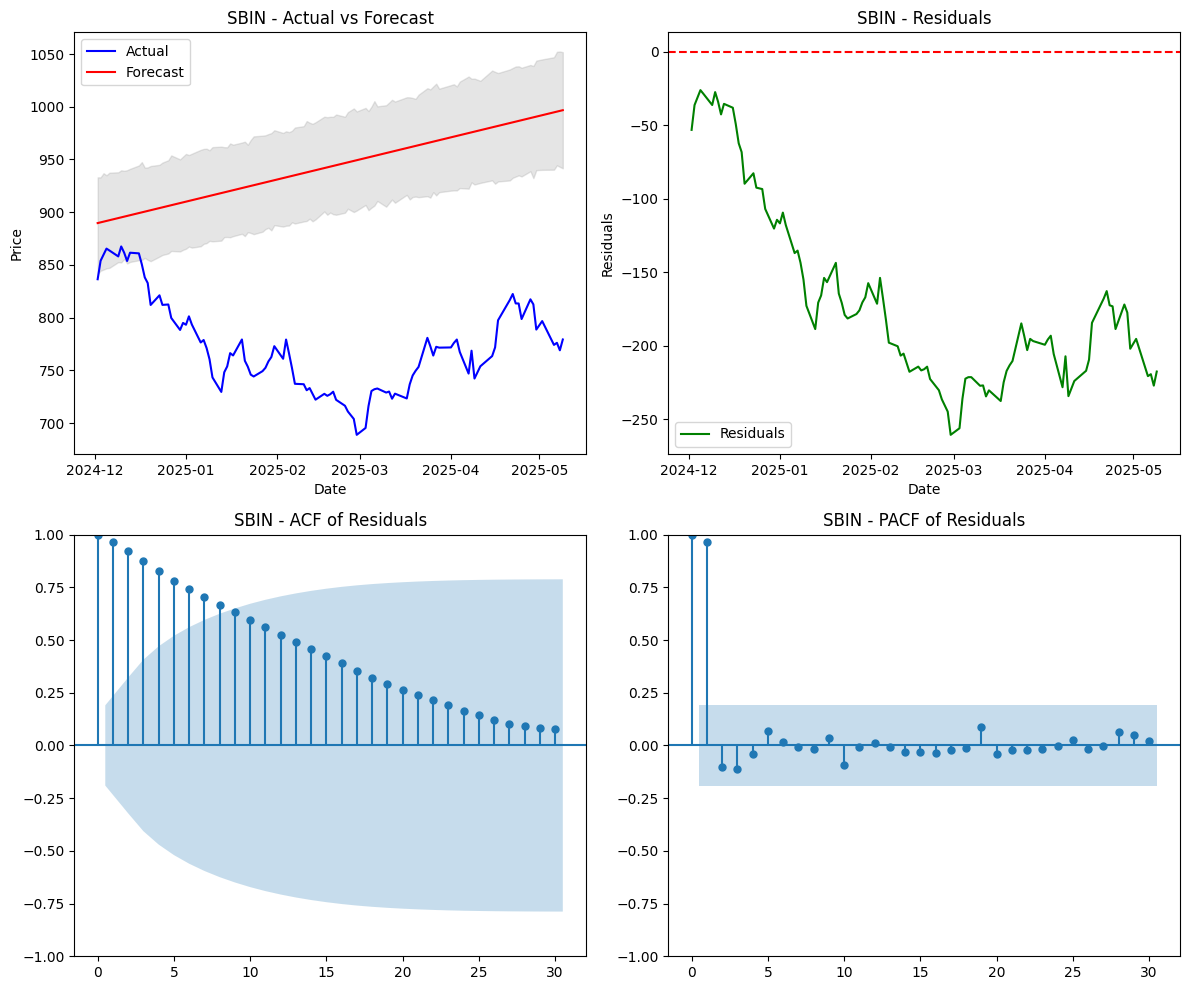

DEBUG:cmdstanpy:input tempfile: /tmp/tmpu42h5kt7/8fso6tb3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu42h5kt7/o98f1lc1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=696', 'data', 'file=/tmp/tmpu42h5kt7/8fso6tb3.json', 'init=/tmp/tmpu42h5kt7/o98f1lc1.json', 'output', 'file=/tmp/tmpu42h5kt7/prophet_modelncyiujrh/prophet_model-20250511200844.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:08:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


🔍 Processing stock: HDFC 


20:08:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


✅ RMSE for HDFC : 125.98
✅ MAPE for HDFC : 5.29%


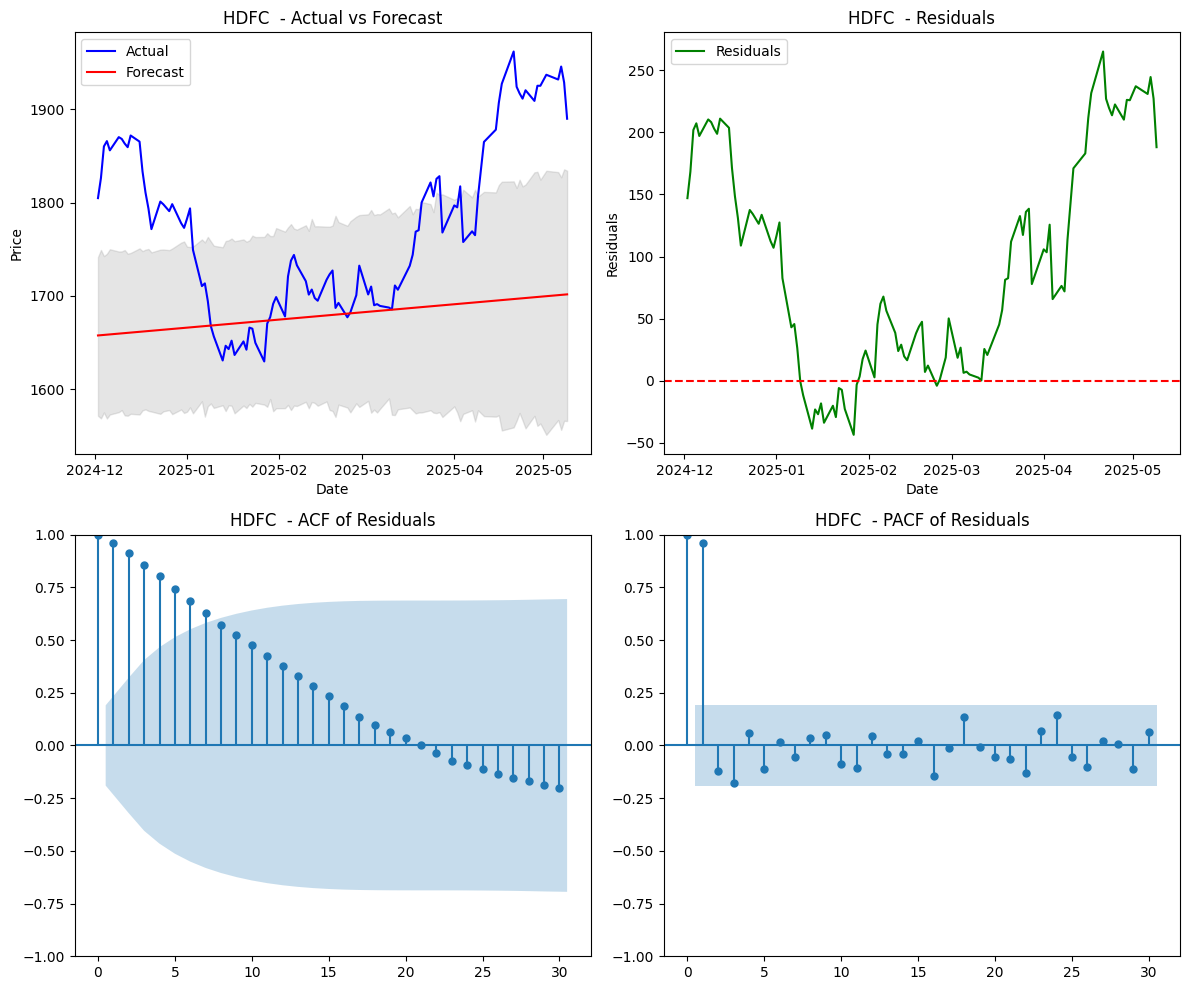

DEBUG:cmdstanpy:input tempfile: /tmp/tmpu42h5kt7/8h55ymuo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu42h5kt7/1ovpb5rh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97873', 'data', 'file=/tmp/tmpu42h5kt7/8h55ymuo.json', 'init=/tmp/tmpu42h5kt7/1ovpb5rh.json', 'output', 'file=/tmp/tmpu42h5kt7/prophet_modelxn7unjfp/prophet_model-20250511200846.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:08:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


🔍 Processing stock: ICICI


20:08:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


✅ RMSE for ICICI: 83.97
✅ MAPE for ICICI: 5.54%


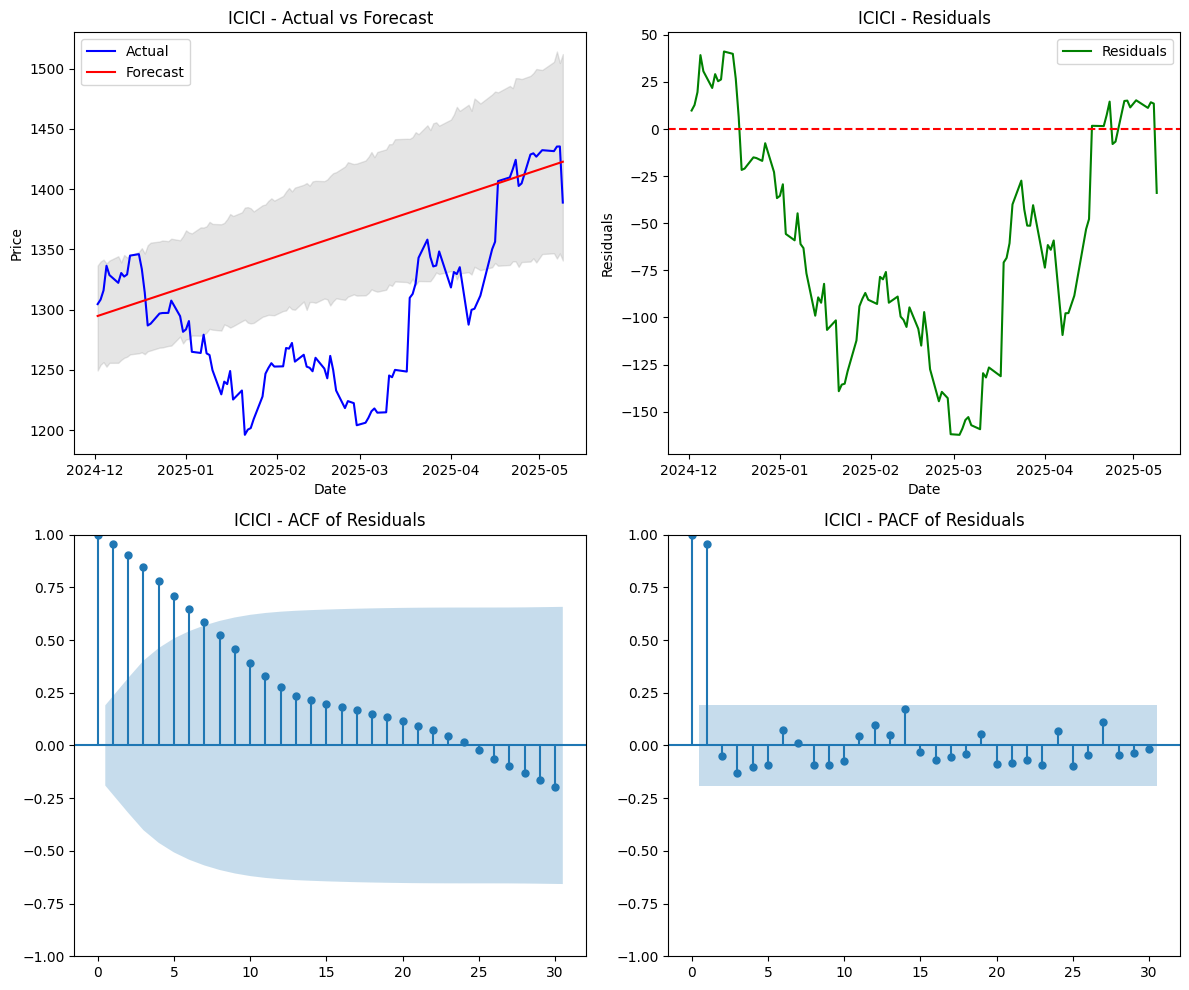

DEBUG:cmdstanpy:input tempfile: /tmp/tmpu42h5kt7/ea4x7ptz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu42h5kt7/4eiy7quz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34665', 'data', 'file=/tmp/tmpu42h5kt7/ea4x7ptz.json', 'init=/tmp/tmpu42h5kt7/4eiy7quz.json', 'output', 'file=/tmp/tmpu42h5kt7/prophet_modellgke5_db/prophet_model-20250511200847.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:08:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


🔍 Processing stock: Kotak


20:08:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


✅ RMSE for Kotak: 250.10
✅ MAPE for Kotak: 9.62%


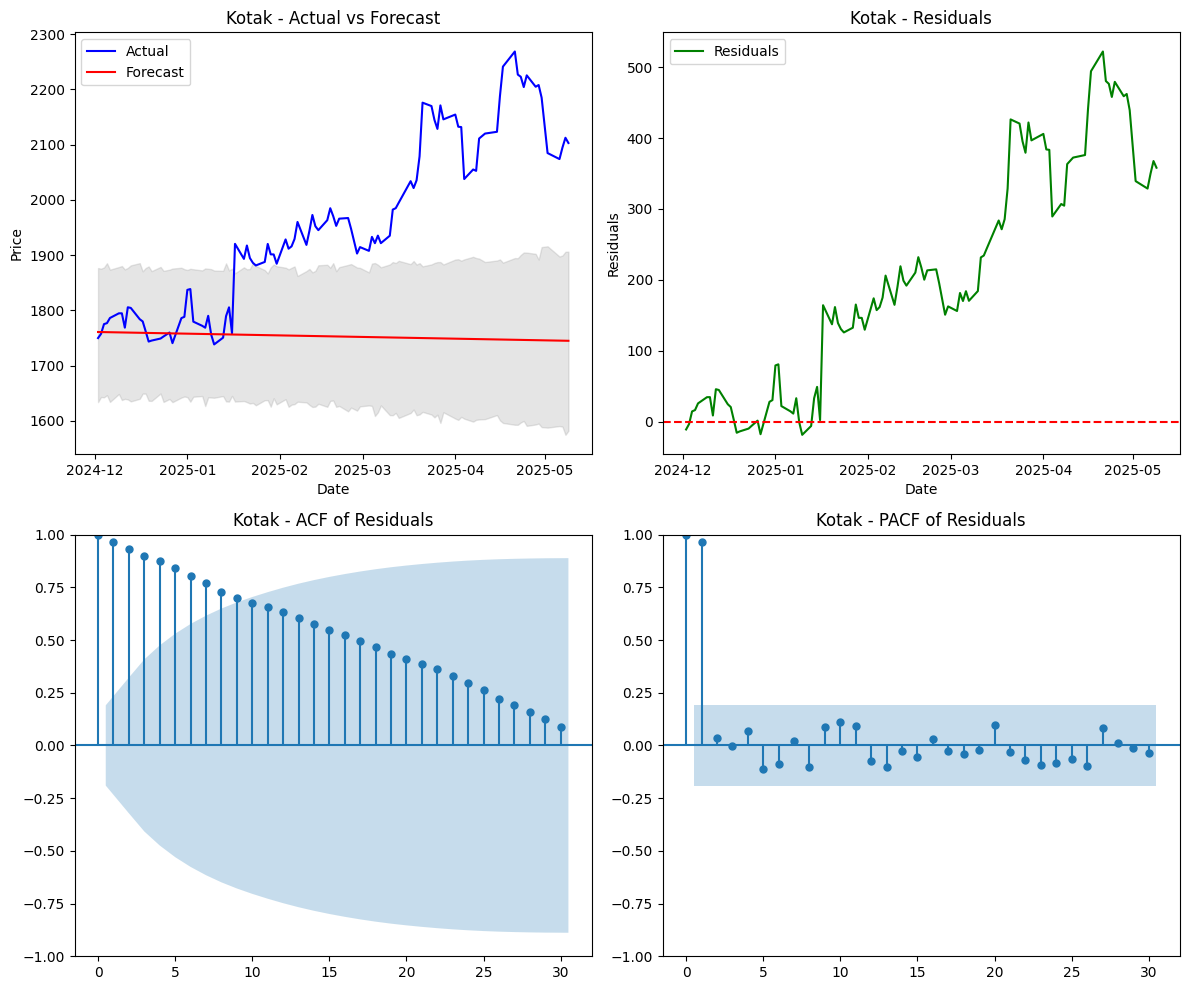

DEBUG:cmdstanpy:input tempfile: /tmp/tmpu42h5kt7/w046to1t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu42h5kt7/3uzk2mr2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51983', 'data', 'file=/tmp/tmpu42h5kt7/w046to1t.json', 'init=/tmp/tmpu42h5kt7/3uzk2mr2.json', 'output', 'file=/tmp/tmpu42h5kt7/prophet_model_3et46v0/prophet_model-20250511200848.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:08:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


🔍 Processing stock: Axis


20:08:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


✅ RMSE for Axis: 217.30
✅ MAPE for Axis: 19.70%


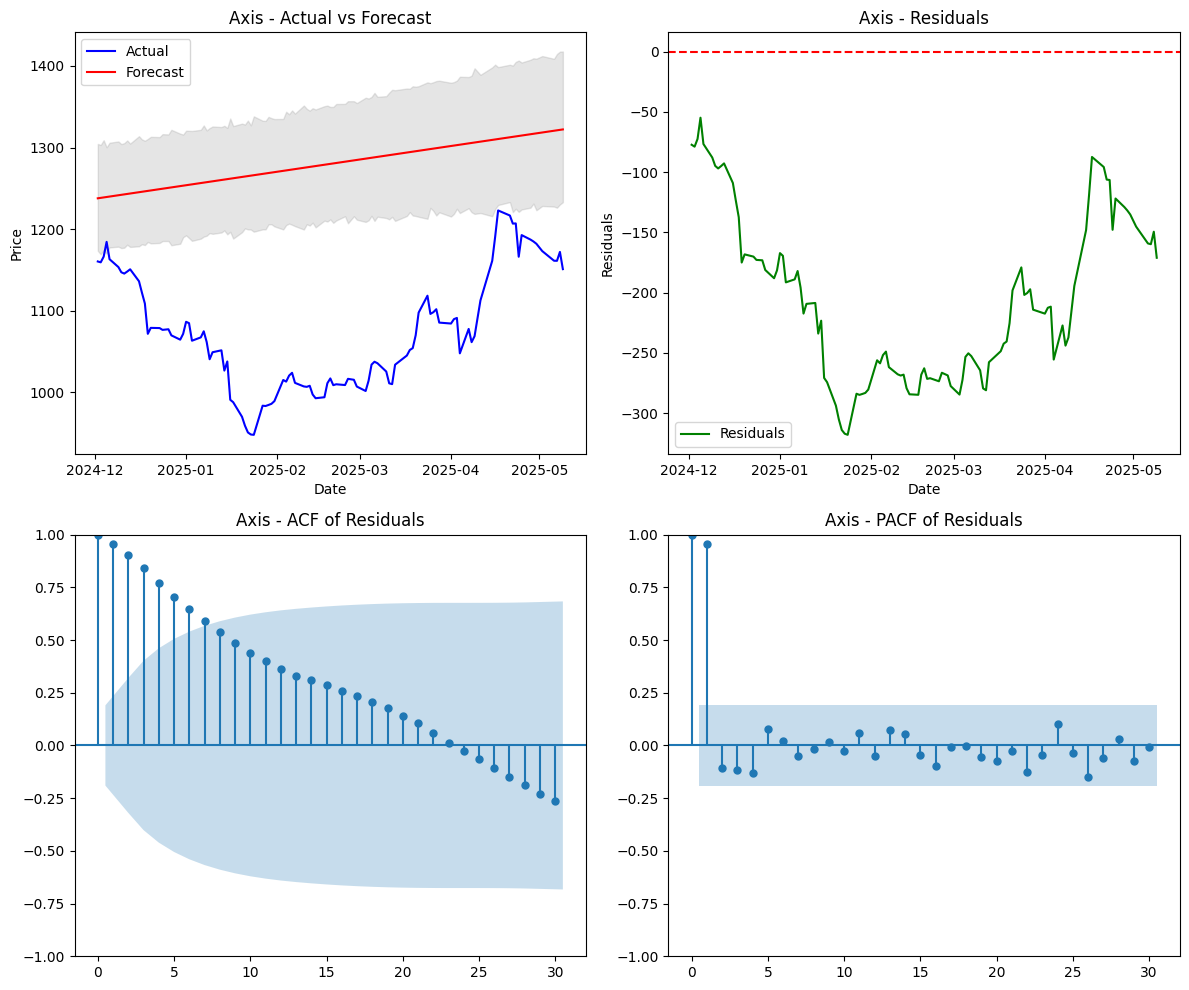


 Summary for All Stocks:
SBIN - RMSE: 179.05, MAPE: 22.17%
HDFC  - RMSE: 125.98, MAPE: 5.29%
ICICI - RMSE: 83.97, MAPE: 5.54%
Kotak - RMSE: 250.10, MAPE: 9.62%
Axis - RMSE: 217.30, MAPE: 19.70%


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_squared_error
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Dictionary to store models, predictions, and residuals
models = {}
predictions = {}
residuals = {}

# Small constant to avoid division by zero
epsilon = 1e-10

# Loop through each stock
for stock in Bank.columns:
    print(f"🔍 Processing stock: {stock}")

    # Prepare train and test DataFrames
    train_df = train_Bank[[stock]].reset_index().rename(columns={'Date': 'ds', stock: 'y'})
    test_df = test_Bank[[stock]].reset_index().rename(columns={'Date': 'ds', stock: 'y'})

    # Initialize Prophet model
    model = Prophet(daily_seasonality=False, yearly_seasonality=False, weekly_seasonality=False)
    model.fit(train_df)

    # Combine future dates (train + test)
    future = pd.concat([train_df[['ds']], test_df[['ds']]]).drop_duplicates().reset_index(drop=True)

    # Make prediction
    forecast = model.predict(future)

    # Extract only test-period predictions
    forecast_test = forecast[forecast['ds'].isin(test_df['ds'])]

    # Merge predictions with actuals to align and avoid NaNs
    merged = pd.merge(test_df, forecast_test[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on='ds', how='inner')

    # Check for any missing values
    if merged.isnull().values.any():
        print(f"⚠️ Warning: NaNs found in merged data for {stock}. They will be dropped.")
        merged = merged.dropna()

    # Compute residuals and store them
    residual = merged['y'] - merged['yhat']
    residuals[stock] = residual.values

    # Compute RMSE and MAPE
    rmse = np.sqrt(mean_squared_error(merged['y'], merged['yhat']))
    mape = np.mean(np.abs((merged['y'] - merged['yhat']) / (merged['y'] + epsilon))) * 100

    print(f"✅ RMSE for {stock}: {rmse:.2f}")
    print(f"✅ MAPE for {stock}: {mape:.2f}%")

    # Store model and prediction
    models[stock] = model
    predictions[stock] = merged

    # Plot diagnostics
    plt.figure(figsize=(12, 10))

    # 1. Actual vs Forecast
    plt.subplot(221)
    plt.plot(merged['ds'], merged['y'], label='Actual', color='blue')
    plt.plot(merged['ds'], merged['yhat'], label='Forecast', color='red')
    plt.fill_between(merged['ds'], merged['yhat_lower'], merged['yhat_upper'], color='gray', alpha=0.2)
    plt.title(f"{stock} - Actual vs Forecast")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()

    # 2. Residuals
    plt.subplot(222)
    plt.plot(merged['ds'], residual, color='green', label='Residuals')
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title(f"{stock} - Residuals")
    plt.xlabel("Date")
    plt.ylabel("Residuals")
    plt.legend()

    # 3. ACF of Residuals
    plt.subplot(223)
    plot_acf(residual, lags=30, ax=plt.gca())
    plt.title(f"{stock} - ACF of Residuals")

    # 4. PACF of Residuals
    plt.subplot(224)
    plot_pacf(residual, lags=30, ax=plt.gca())
    plt.title(f"{stock} - PACF of Residuals")

    plt.tight_layout()
    plt.show()

# Optional summary at the end
print("\n Summary for All Stocks:")
for stock in models.keys():
    merged = predictions[stock]
    rmse = np.sqrt(mean_squared_error(merged['y'], merged['yhat']))
    mape = np.mean(np.abs((merged['y'] - merged['yhat']) / (merged['y'] + epsilon))) * 100
    print(f"{stock} - RMSE: {rmse:.2f}, MAPE: {mape:.2f}%")


## With Seasonality

DEBUG:cmdstanpy:input tempfile: /tmp/tmpu42h5kt7/9mdt_bl7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu42h5kt7/1cs7igpl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80936', 'data', 'file=/tmp/tmpu42h5kt7/9mdt_bl7.json', 'init=/tmp/tmpu42h5kt7/1cs7igpl.json', 'output', 'file=/tmp/tmpu42h5kt7/prophet_model6c2gccv0/prophet_model-20250511200641.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:06:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


🔍 Processing stock: SBIN


20:06:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


✅ RMSE for SBIN: 179.44
✅ MAPE for SBIN: 22.22%


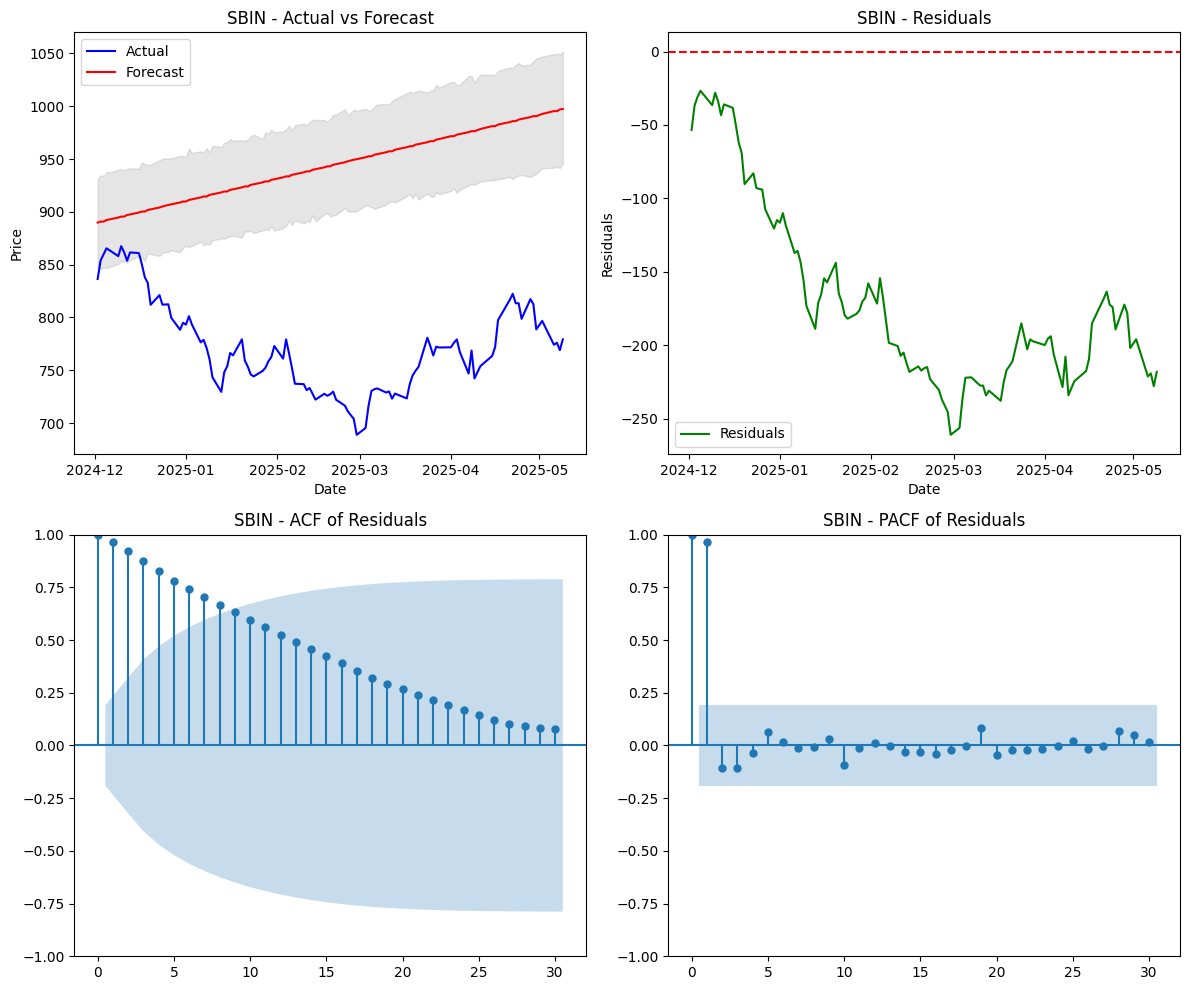

DEBUG:cmdstanpy:input tempfile: /tmp/tmpu42h5kt7/tpy0cyid.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu42h5kt7/279dnbbr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67690', 'data', 'file=/tmp/tmpu42h5kt7/tpy0cyid.json', 'init=/tmp/tmpu42h5kt7/279dnbbr.json', 'output', 'file=/tmp/tmpu42h5kt7/prophet_model4nksjhvr/prophet_model-20250511200643.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:06:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


🔍 Processing stock: HDFC 


20:06:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


✅ RMSE for HDFC : 128.75
✅ MAPE for HDFC : 5.45%


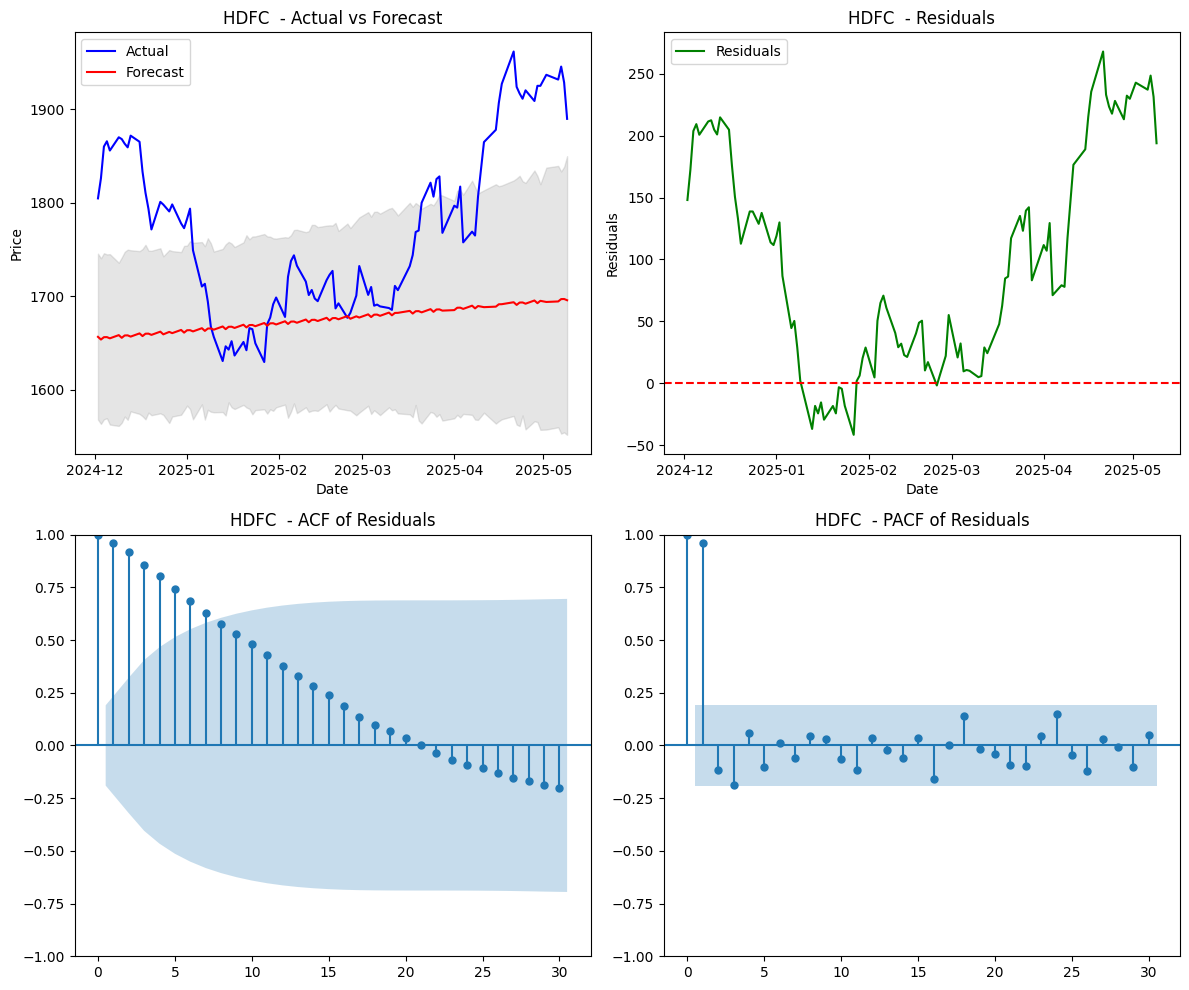

DEBUG:cmdstanpy:input tempfile: /tmp/tmpu42h5kt7/ztyw70ub.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu42h5kt7/1f3zig8l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24271', 'data', 'file=/tmp/tmpu42h5kt7/ztyw70ub.json', 'init=/tmp/tmpu42h5kt7/1f3zig8l.json', 'output', 'file=/tmp/tmpu42h5kt7/prophet_model0zxklygi/prophet_model-20250511200644.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:06:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


🔍 Processing stock: ICICI


20:06:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


✅ RMSE for ICICI: 84.89
✅ MAPE for ICICI: 5.59%


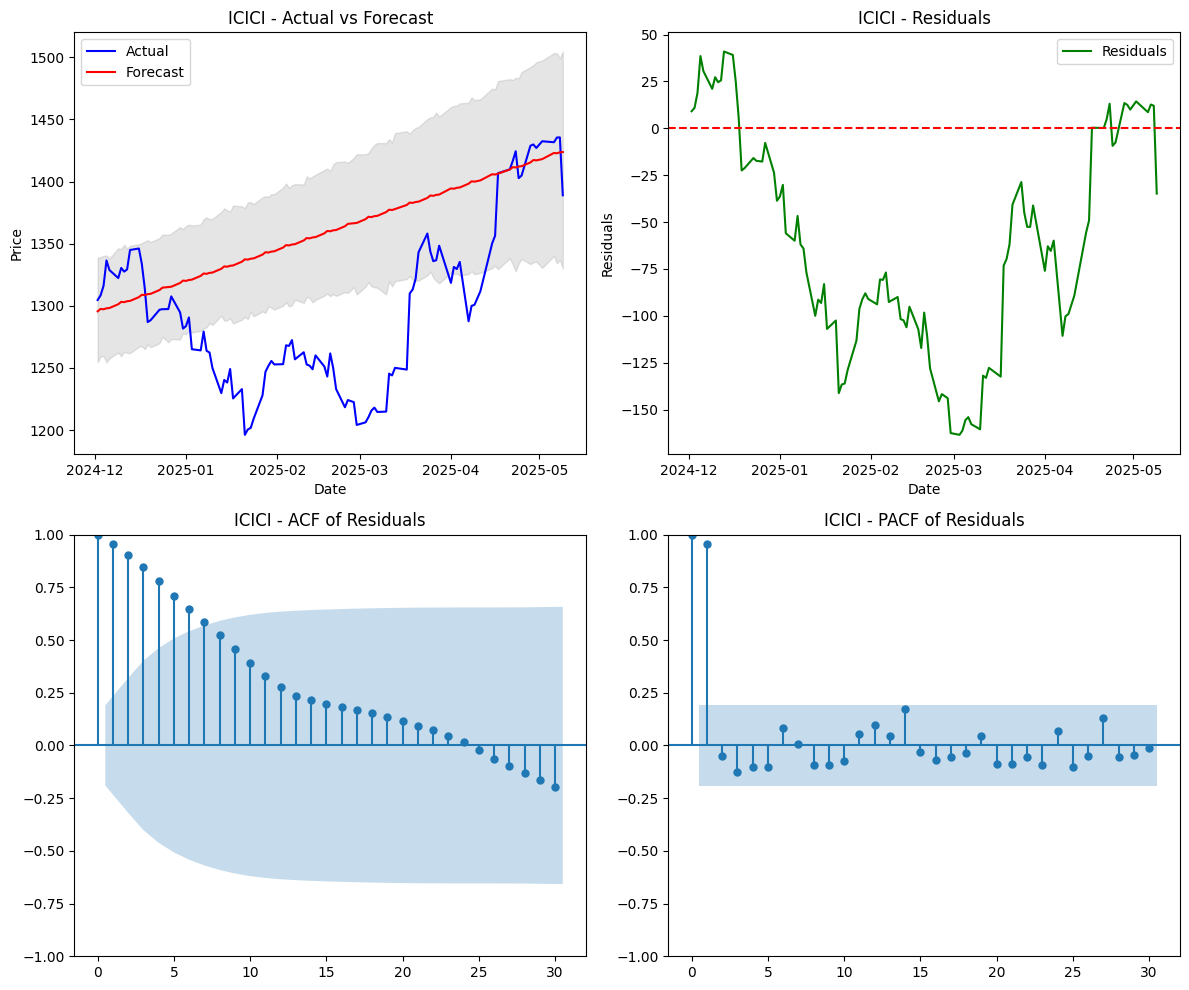

DEBUG:cmdstanpy:input tempfile: /tmp/tmpu42h5kt7/gbhisy8p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu42h5kt7/43vo20cn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13377', 'data', 'file=/tmp/tmpu42h5kt7/gbhisy8p.json', 'init=/tmp/tmpu42h5kt7/43vo20cn.json', 'output', 'file=/tmp/tmpu42h5kt7/prophet_modelmtwkrds6/prophet_model-20250511200646.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:06:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


🔍 Processing stock: Kotak


20:06:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


✅ RMSE for Kotak: 251.32
✅ MAPE for Kotak: 9.68%


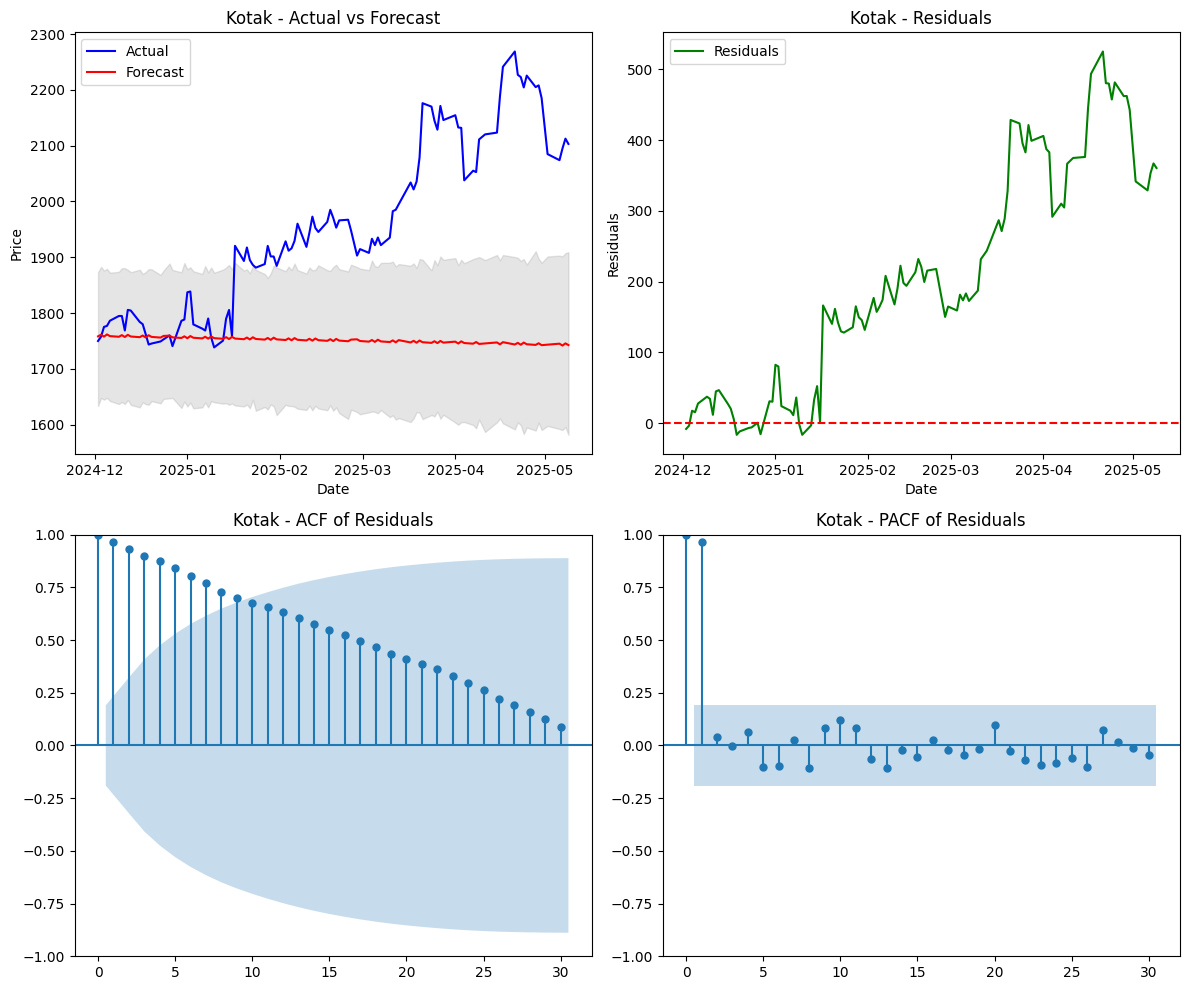

DEBUG:cmdstanpy:input tempfile: /tmp/tmpu42h5kt7/vccxt2vq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu42h5kt7/d603hep2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57956', 'data', 'file=/tmp/tmpu42h5kt7/vccxt2vq.json', 'init=/tmp/tmpu42h5kt7/d603hep2.json', 'output', 'file=/tmp/tmpu42h5kt7/prophet_modelrhf2uy8a/prophet_model-20250511200647.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:06:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


🔍 Processing stock: Axis


20:06:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


✅ RMSE for Axis: 217.91
✅ MAPE for Axis: 19.76%


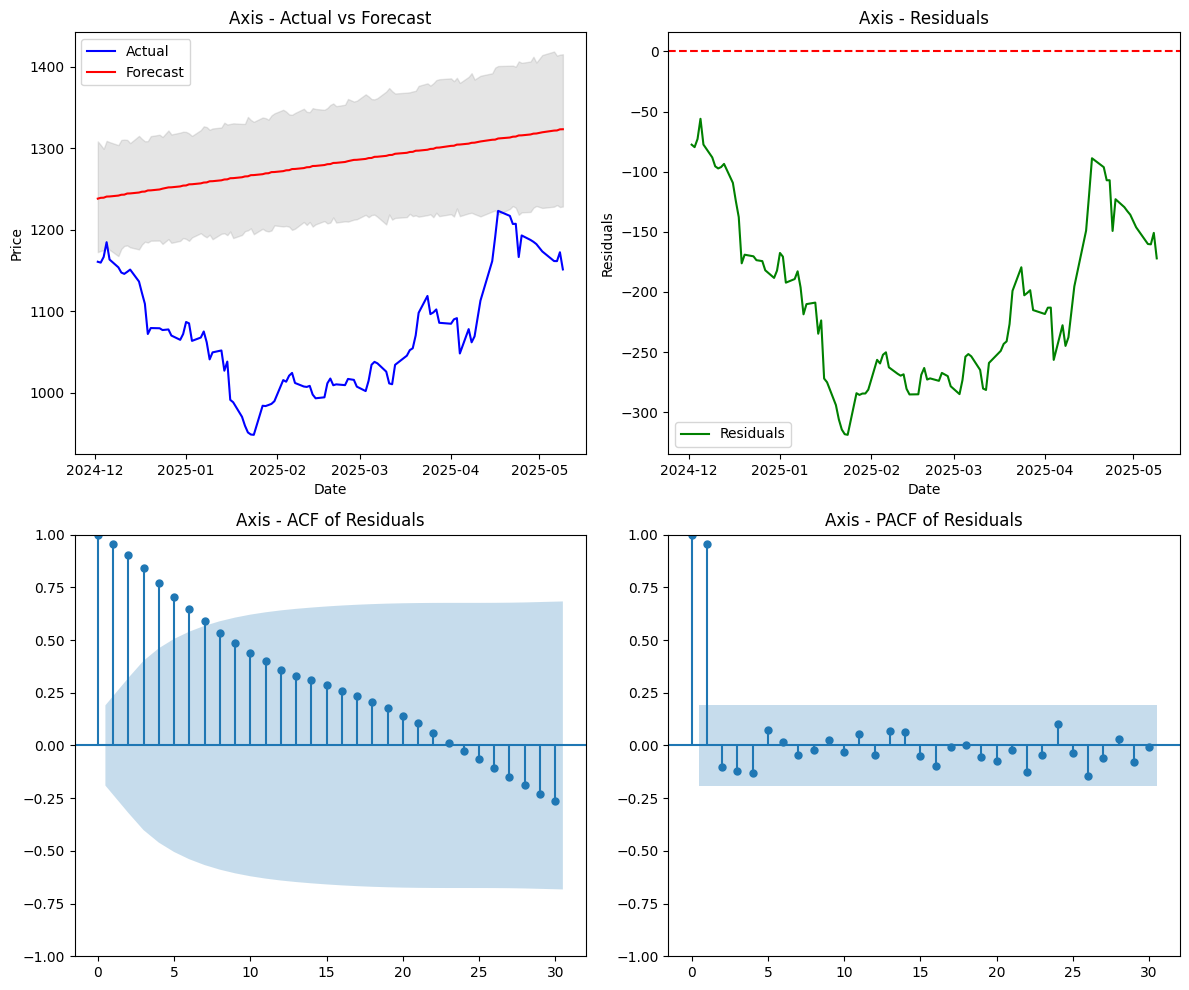


 Summary for All Stocks:
SBIN - RMSE: 179.44, MAPE: 22.22%
HDFC  - RMSE: 128.75, MAPE: 5.45%
ICICI - RMSE: 84.89, MAPE: 5.59%
Kotak - RMSE: 251.32, MAPE: 9.68%
Axis - RMSE: 217.91, MAPE: 19.76%


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_squared_error
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Dictionary to store models, predictions, and residuals
models = {}
predictions = {}
residuals = {}

# Small constant to avoid division by zero
epsilon = 1e-10

# Loop through each stock
for stock in Bank.columns:
    print(f"🔍 Processing stock: {stock}")

    # Prepare train and test DataFrames
    train_df = train_Bank[[stock]].reset_index().rename(columns={'Date': 'ds', stock: 'y'})
    test_df = test_Bank[[stock]].reset_index().rename(columns={'Date': 'ds', stock: 'y'})

    # Initialize Prophet model
    model = Prophet(daily_seasonality=False, yearly_seasonality=False, weekly_seasonality=True)
    model.fit(train_df)

    # Combine future dates (train + test)
    future = pd.concat([train_df[['ds']], test_df[['ds']]]).drop_duplicates().reset_index(drop=True)

    # Make prediction
    forecast = model.predict(future)

    # Extract only test-period predictions
    forecast_test = forecast[forecast['ds'].isin(test_df['ds'])]

    # Merge predictions with actuals to align and avoid NaNs
    merged = pd.merge(test_df, forecast_test[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on='ds', how='inner')

    # Check for any missing values
    if merged.isnull().values.any():
        print(f"⚠️ Warning: NaNs found in merged data for {stock}. They will be dropped.")
        merged = merged.dropna()

    # Compute residuals and store them
    residual = merged['y'] - merged['yhat']
    residuals[stock] = residual.values

    # Compute RMSE and MAPE
    rmse = np.sqrt(mean_squared_error(merged['y'], merged['yhat']))
    mape = np.mean(np.abs((merged['y'] - merged['yhat']) / (merged['y'] + epsilon))) * 100

    print(f"✅ RMSE for {stock}: {rmse:.2f}")
    print(f"✅ MAPE for {stock}: {mape:.2f}%")

    # Store model and prediction
    models[stock] = model
    predictions[stock] = merged

    # Plot diagnostics
    plt.figure(figsize=(12, 10))

    # 1. Actual vs Forecast
    plt.subplot(221)
    plt.plot(merged['ds'], merged['y'], label='Actual', color='blue')
    plt.plot(merged['ds'], merged['yhat'], label='Forecast', color='red')
    plt.fill_between(merged['ds'], merged['yhat_lower'], merged['yhat_upper'], color='gray', alpha=0.2)
    plt.title(f"{stock} - Actual vs Forecast")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()

    # 2. Residuals
    plt.subplot(222)
    plt.plot(merged['ds'], residual, color='green', label='Residuals')
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title(f"{stock} - Residuals")
    plt.xlabel("Date")
    plt.ylabel("Residuals")
    plt.legend()

    # 3. ACF of Residuals
    plt.subplot(223)
    plot_acf(residual, lags=30, ax=plt.gca())
    plt.title(f"{stock} - ACF of Residuals")

    # 4. PACF of Residuals
    plt.subplot(224)
    plot_pacf(residual, lags=30, ax=plt.gca())
    plt.title(f"{stock} - PACF of Residuals")

    plt.tight_layout()
    plt.show()

# Optional summary at the end
print("\n Summary for All Stocks:")
for stock in models.keys():
    merged = predictions[stock]
    rmse = np.sqrt(mean_squared_error(merged['y'], merged['yhat']))
    mape = np.mean(np.abs((merged['y'] - merged['yhat']) / (merged['y'] + epsilon))) * 100
    print(f"{stock} - RMSE: {rmse:.2f}, MAPE: {mape:.2f}%")


***Prophet model is not a good fit as the assumptions are violated.***

# Exponential Smoothing


📈 Processing SBIN:
✅ Best RMSE: 43.16 | MAPE: 4.84%
🔧 Best Params → α: 0.8, β: 0.3, γ: 0.5, Trend: mul, Seasonal: mul


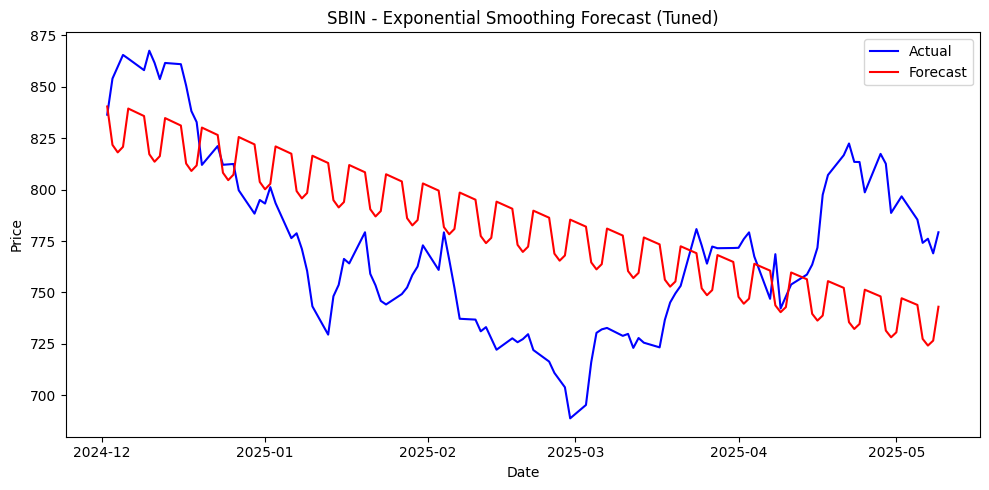


📈 Processing HDFC :
✅ Best RMSE: 94.42 | MAPE: 4.63%
🔧 Best Params → α: 0.8, β: 0.5, γ: 0.1, Trend: add, Seasonal: add


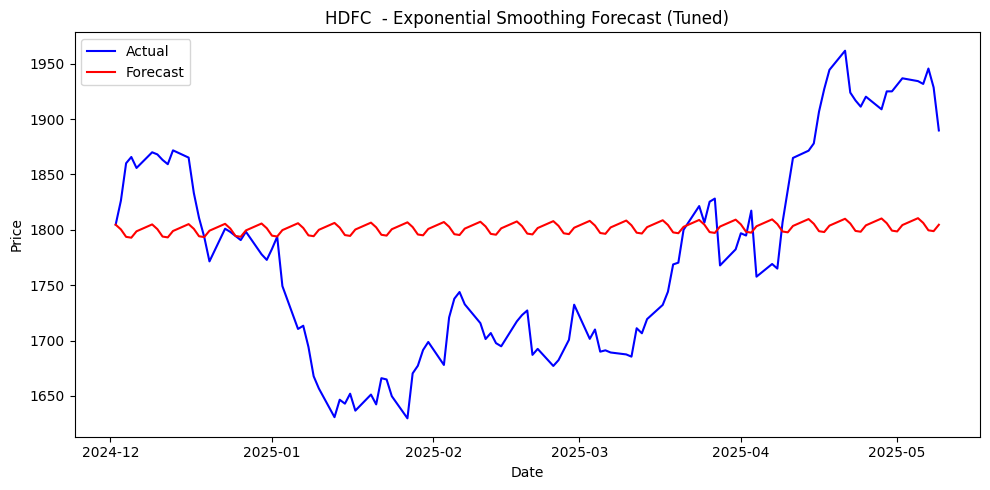


📈 Processing ICICI:
✅ Best RMSE: 63.97 | MAPE: 4.16%
🔧 Best Params → α: 0.6, β: 0.5, γ: 0.1, Trend: mul, Seasonal: None


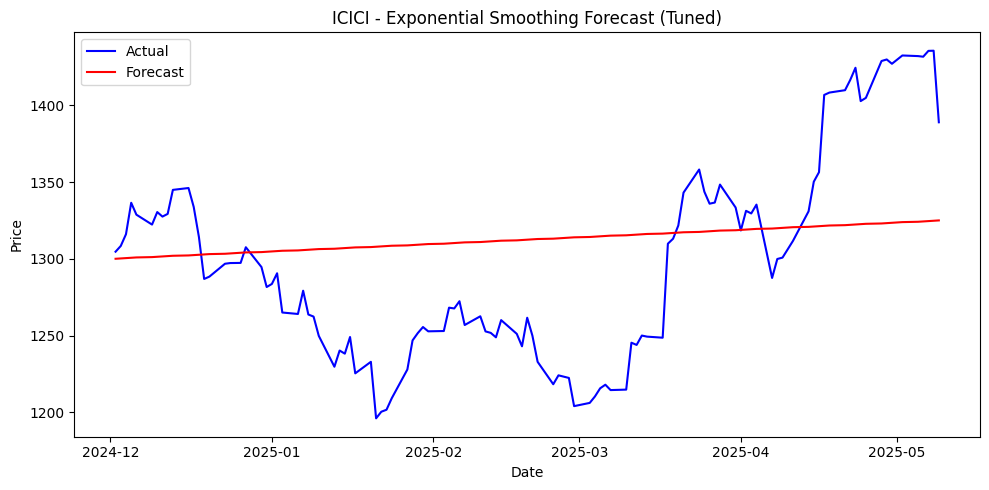


📈 Processing Kotak:
✅ Best RMSE: 65.58 | MAPE: 2.64%
🔧 Best Params → α: 0.2, β: 0.3, γ: 0.3, Trend: mul, Seasonal: mul


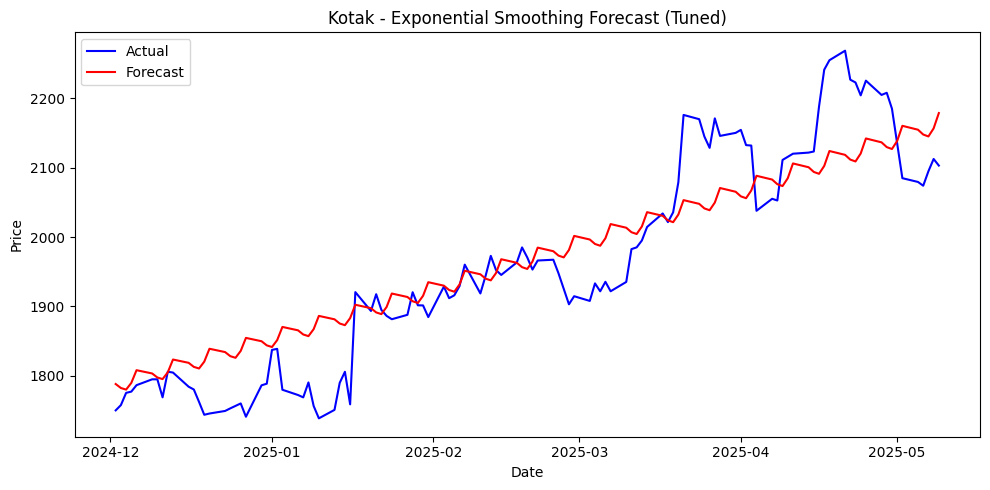


📈 Processing Axis:
✅ Best RMSE: 83.60 | MAPE: 6.78%
🔧 Best Params → α: 0.6, β: 0.3, γ: 0.5, Trend: mul, Seasonal: mul


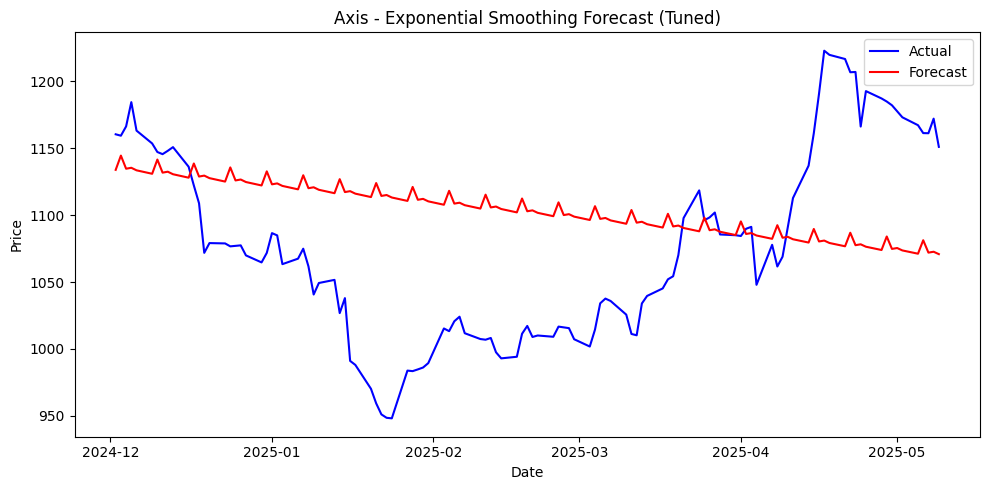


📊 Summary of Tuned Exponential Smoothing Performance:
Stock      RMSE       MAPE       Alpha  Beta   Gamma  Trend   Seasonal
SBIN       43.16      4.84       0.8    0.3    0.5    mul     mul
HDFC       94.42      4.63       0.8    0.5    0.1    add     add
ICICI      63.97      4.16       0.6    0.5    0.1    mul     None
Kotak      65.58      2.64       0.2    0.3    0.3    mul     mul
Axis       83.60      6.78       0.6    0.3    0.5    mul     mul


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

# Dictionary to store performance metrics
es_results = {}

# Grid of parameters to search
alphas = [0.2, 0.4, 0.6, 0.8]
betas = [0.1, 0.3, 0.5]
gammas = [0.1, 0.3, 0.5]
trend_types = ['add', 'mul']
seasonal_types = [None, 'add', 'mul']
seasonal_periods = 5  # Adjust as per your data

# Loop through each stock column
for stock in Bank.columns:
    print(f"\n📈 Processing {stock}:")

    train = train_Bank[stock].copy()
    test = test_Bank[stock].copy()

    # Fill missing business days
    train_index = pd.date_range(train.index.min(), train.index.max(), freq='B')
    test_index = pd.date_range(test.index.min(), test.index.max(), freq='B')
    train = train.reindex(train_index).interpolate()
    test = test.reindex(test_index).interpolate()

    best_rmse = float('inf')
    best_params = (None, None, None)
    best_types = (None, None)
    best_forecast = None

    # Grid search
    for trend_type in trend_types:
        for seasonal_type in seasonal_types:
            # Skip if not enough data for seasonal
            if seasonal_type and len(train) < seasonal_periods:
                continue
            for alpha in alphas:
                for beta in betas:
                    for gamma in gammas:
                        try:
                            model = ExponentialSmoothing(
                                train,
                                trend=trend_type,
                                seasonal=seasonal_type,
                                seasonal_periods=seasonal_periods
                            )
                            model_fit = model.fit(
                                smoothing_level=alpha,
                                smoothing_trend=beta,
                                smoothing_seasonal=gamma,
                                optimized=False
                            )

                            forecast = model_fit.forecast(len(test))
                            forecast = pd.Series(forecast.values, index=test.index)

                            # Clean NaNs
                            valid_idx = forecast.notna() & test.notna()
                            forecast_clean = forecast[valid_idx]
                            test_clean = test[valid_idx]

                            # Skip if too few valid points
                            if len(forecast_clean) < 3:
                                continue

                            rmse = np.sqrt(mean_squared_error(test_clean, forecast_clean))

                            if rmse < best_rmse:
                                best_rmse = rmse
                                best_params = (alpha, beta, gamma)
                                best_types = (trend_type, seasonal_type)
                                best_forecast = forecast_clean

                        except Exception:
                            continue

    # Check if a valid model was found
    if best_forecast is None:
        print(f"❌ No valid model found for {stock}. Skipping.")
        continue

    # Final MAPE using best forecast
    test_clean = test[best_forecast.index]
    denom = np.where(np.abs(test_clean) < 1e-5, 1, test_clean)
    mape = np.mean(np.abs((test_clean - best_forecast) / denom)) * 100

    # Store metrics
    es_results[stock] = {
        'RMSE': best_rmse,
        'MAPE': mape,
        'Alpha': best_params[0],
        'Beta': best_params[1],
        'Gamma': best_params[2],
        'Trend': best_types[0],
        'Seasonal': best_types[1]
    }

    print(f"✅ Best RMSE: {best_rmse:.2f} | MAPE: {mape:.2f}%")
    print(f"🔧 Best Params → α: {best_params[0]}, β: {best_params[1]}, γ: {best_params[2]}, "
          f"Trend: {best_types[0]}, Seasonal: {best_types[1]}")

    # Plot forecast vs actual
    plt.figure(figsize=(10, 5))
    plt.plot(test.index, test, label='Actual', color='blue')
    plt.plot(best_forecast.index, best_forecast, label='Forecast', color='red')
    plt.title(f"{stock} - Exponential Smoothing Forecast (Tuned)")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.tight_layout()
    plt.show()

# Summary table
print("\n📊 Summary of Tuned Exponential Smoothing Performance:")
print(f"{'Stock':<10} {'RMSE':<10} {'MAPE':<10} {'Alpha':<6} {'Beta':<6} {'Gamma':<6} {'Trend':<7} {'Seasonal'}")
for stock, metrics in es_results.items():
    print(f"{stock:<10} {metrics['RMSE']:<10.2f} {metrics['MAPE']:<10.2f} "
          f"{metrics['Alpha']:<6} {metrics['Beta']:<6} {metrics['Gamma']:<6} "
          f"{metrics['Trend']:<7} {metrics['Seasonal']}")

# LSTM

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

# Define a function to prepare the data
def prepare_data(data, n_steps):
    X, y = [], []
    for i in range(n_steps, len(data)):
        X.append(data[i-n_steps:i, 0])  # n_steps previous values
        y.append(data[i, 0])  # current value
    return np.array(X), np.array(y)

# Evaluate different n_steps
def evaluate_n_steps(train_Bank, test_Bank, n_steps_values):
    results = {}
    for n_steps in n_steps_values:
        print(f"Testing for n_steps = {n_steps}")
        # Prepare data for LSTM
        scaler = MinMaxScaler(feature_range=(0, 1))
        train_scaled = scaler.fit_transform(train_Bank.values.reshape(-1, 1))
        test_scaled = scaler.transform(test_Bank.values.reshape(-1, 1))

        X_train, y_train = prepare_data(train_scaled, n_steps)
        X_test, y_test = prepare_data(test_scaled, n_steps)

        # Reshape input data for LSTM [samples, time steps, features]
        X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
        X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

        # Build LSTM model
        model = Sequential()
        model.add(LSTM(units=50, activation='relu', input_shape=(n_steps, 1)))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mean_squared_error')

        # Train the model
        model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

        # Predict using the trained model
        y_pred = model.predict(X_test, batch_size=32)
        y_pred_rescaled = scaler.inverse_transform(y_pred)
        y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

        # Evaluate performance
        rmse = sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))
        results[n_steps] = rmse
        print(f"RMSE for n_steps={n_steps}: {rmse}")

    return results

n_steps_values = [60, 90]
results = evaluate_n_steps(train_Bank['SBIN'], test_Bank['SBIN'], n_steps_values)

# Print the results
best_n_steps = min(results, key=results.get)
print(f"The best n_steps value is {best_n_steps} with RMSE: {results[best_n_steps]}")

Testing for n_steps = 60


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
RMSE for n_steps=60: 21.0804936992283
Testing for n_steps = 90


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
RMSE for n_steps=90: 30.836206683834043
The best n_steps value is 60 with RMSE: 21.0804936992283



Evaluating LSTM for stock: SBIN
Evaluating for n_steps = 60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
RMSE for n_steps=60: 20.943753553172844
MAPE for n_steps=60: 2.3075578083034616%


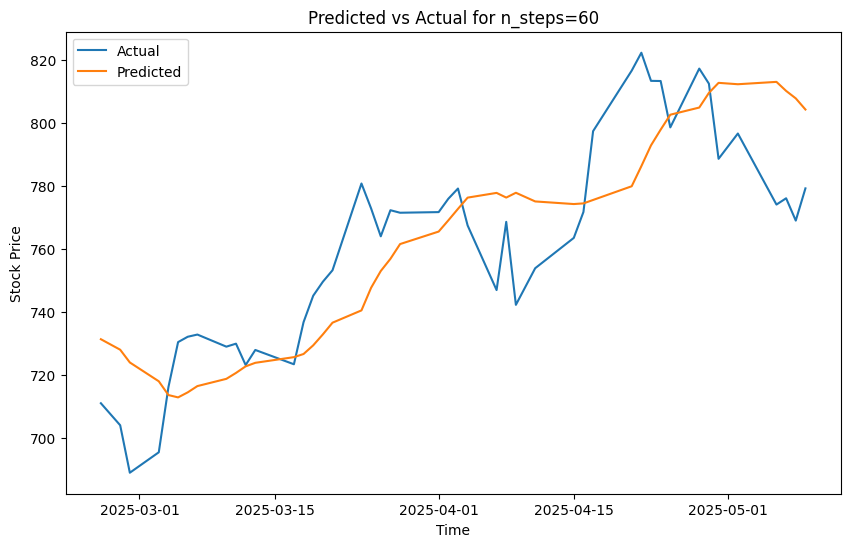

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step

Evaluating LSTM for stock: HDFC 
Evaluating for n_steps = 60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
RMSE for n_steps=60: 39.193766037989214
MAPE for n_steps=60: 1.8417705304544483%


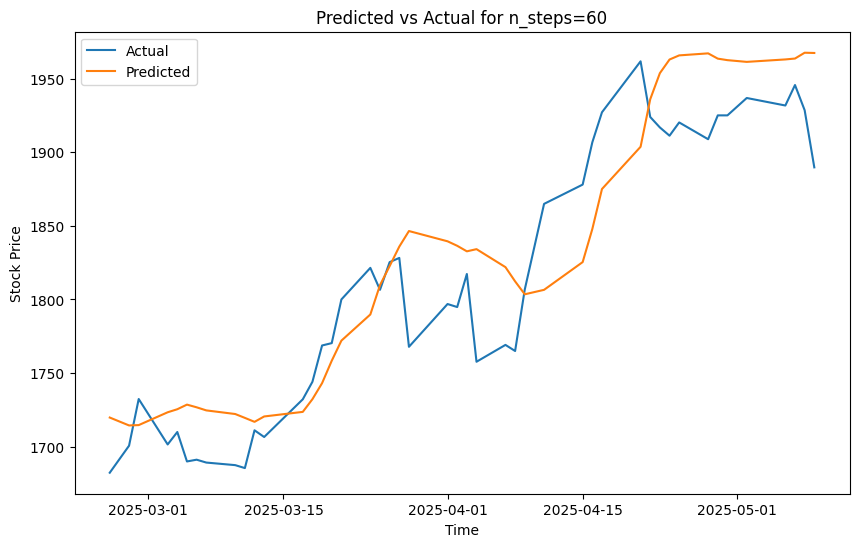

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step

Evaluating LSTM for stock: ICICI
Evaluating for n_steps = 60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
RMSE for n_steps=60: 35.834289287102365
MAPE for n_steps=60: 2.1935716811528323%


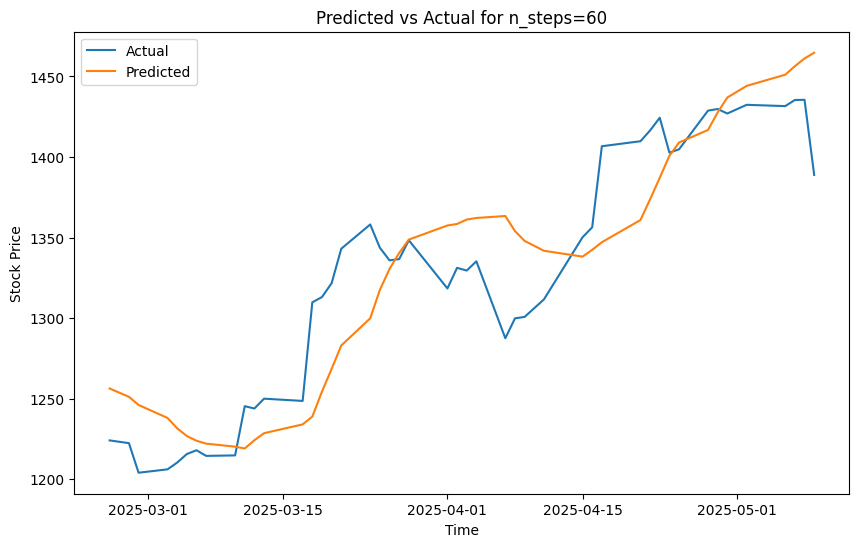

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step

Evaluating LSTM for stock: Kotak
Evaluating for n_steps = 60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
RMSE for n_steps=60: 66.4322484831408
MAPE for n_steps=60: 2.4413528020973407%


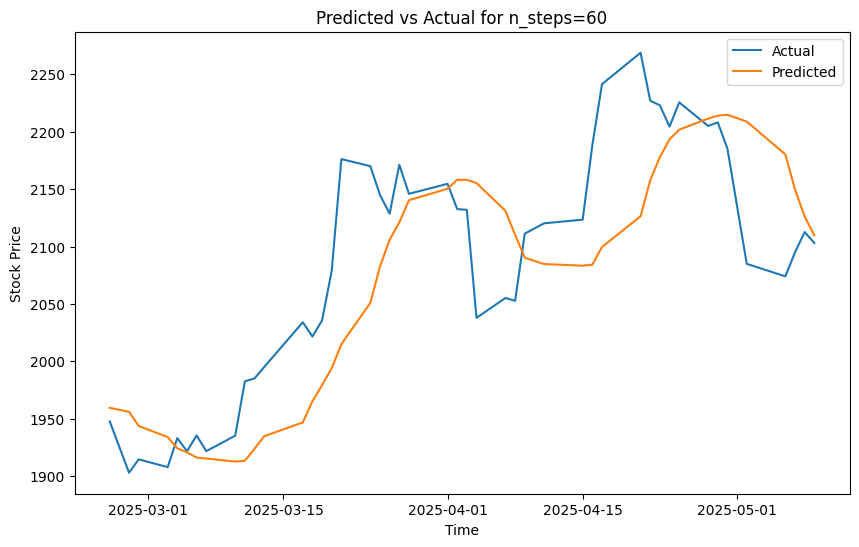

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step

Evaluating LSTM for stock: Axis
Evaluating for n_steps = 60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
RMSE for n_steps=60: 56.71490872641849
MAPE for n_steps=60: 3.797354462214246%


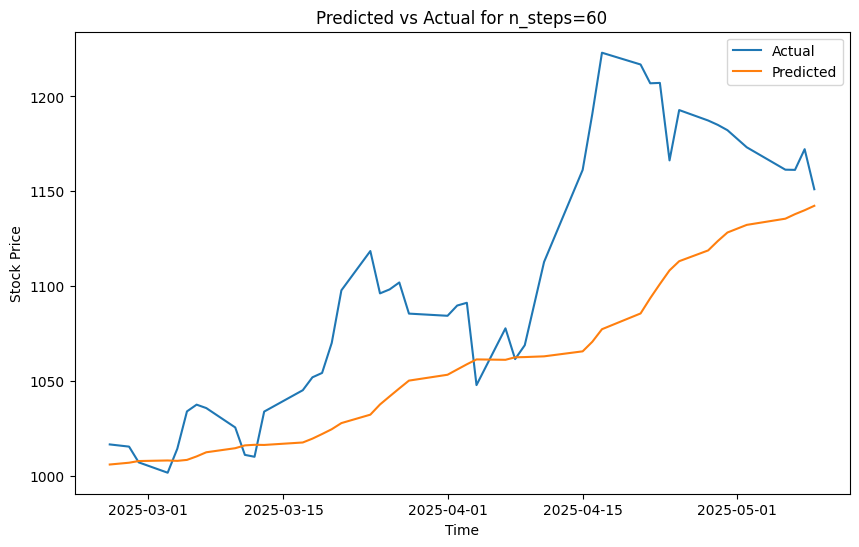

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step

Evaluation Results:
SBIN - RMSE: 20.943753553172844, MAPE: 2.3075578083034616%, Predictions for May 12th & 13th: [np.float32(802.3802), np.float32(803.4895)]
HDFC  - RMSE: 39.193766037989214, MAPE: 1.8417705304544483%, Predictions for May 12th & 13th: [np.float32(1957.0762), np.float32(1963.4658)]
ICICI - RMSE: 35.834289287102365, MAPE: 2.1935716811528323%, Predictions for May 12th & 13th: [np.float32(1457.4586), np.float32(1464.8635)]
Kotak - RMSE: 66.4322484831408, MAPE: 2.4413528020973407%, Predictions for May 12th & 13th: [np.float32(2094.9175), np.float32(2081.7742)]
Axis - RMSE: 56.71490872641849, MAPE: 3.797354462214246%, Predictions for May 12th & 13th: [np.float32(1143.4116), np.float32(1143.7379)]


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import tensorflow as tf

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Define a function to prepare the data
def prepare_data(data, n_steps):
    X, y = [], []
    for i in range(n_steps, len(data)):
        X.append(data[i-n_steps:i, 0])  # n_steps previous values
        y.append(data[i, 0])  # current value
    return np.array(X), np.array(y)

# LSTM model fitting and evaluation for n_steps=60
def evaluate_lstm(train_Bank, test_Bank, n_steps=60):
    print(f"Evaluating for n_steps = {n_steps}")

    # Rescale the data (scale after split)
    scaler = MinMaxScaler(feature_range=(0, 1))
    train_scaled = scaler.fit_transform(train_Bank.values.reshape(-1, 1))
    test_scaled = scaler.transform(test_Bank.values.reshape(-1, 1))

    # Prepare data for LSTM
    X_train, y_train = prepare_data(train_scaled, n_steps)
    X_test, y_test = prepare_data(test_scaled, n_steps)

    # Reshape input data for LSTM [samples, time steps, features]
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

    # Build LSTM model
    model = Sequential()
    model.add(LSTM(units=50, activation='relu', input_shape=(n_steps, 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    # Predict using the trained model
    y_pred = model.predict(X_test, batch_size=32)
    y_pred_rescaled = scaler.inverse_transform(y_pred)
    y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Calculate RMSE and MAPE
    rmse = sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))
    mape = np.mean(np.abs((y_test_rescaled - y_pred_rescaled) / y_test_rescaled)) * 100

    print(f"RMSE for n_steps={n_steps}: {rmse}")
    print(f"MAPE for n_steps={n_steps}: {mape}%")

    # Plot Predicted vs Actual values with respect to Test dataset's time
    plt.figure(figsize=(10, 6))
    plt.plot(test_Bank.index[n_steps:], y_test_rescaled, label="Actual")
    plt.plot(test_Bank.index[n_steps:], y_pred_rescaled, label="Predicted")
    plt.title(f"Predicted vs Actual for n_steps={n_steps}")
    plt.xlabel("Time")
    plt.ylabel("Stock Price")
    plt.legend()
    plt.show()

    # Predict for May 12th and May 13th, 2025
    last_data = test_Bank[-n_steps:].values  # Last n_steps from test data
    last_data_scaled = scaler.transform(last_data.reshape(-1, 1))  # Scale the last n_steps data

    # Predict the next two days
    predictions = []
    for _ in range(2):  # Predicting two days (May 12th and May 13th)
        input_data = last_data_scaled.reshape(1, n_steps, 1)
        next_pred = model.predict(input_data)
        next_pred_rescaled = scaler.inverse_transform(next_pred)
        predictions.append(next_pred_rescaled[0, 0])  # Append the prediction

        # Update the last_data for the next prediction
        last_data_scaled = np.append(last_data_scaled[1:], next_pred, axis=0)

    # Return predictions for the next two days
    return rmse, mape, predictions

# Assuming train_Bank is a DataFrame with stock data (e.g., columns 'SBIN', 'HDFC', etc.)
stocks = train_Bank.columns  # Get all stock names (columns) from the train_Bank DataFrame

results = {}

# Loop over each stock in train_Bank
for stock in stocks:
    print(f"\nEvaluating LSTM for stock: {stock}")
    # Apply the evaluate_lstm function for each stock
    rmse, mape, predictions = evaluate_lstm(train_Bank[stock], test_Bank[stock], n_steps=60)

    # Store results
    results[stock] = {'RMSE': rmse, 'MAPE': mape, 'Predictions for May 12th & 13th': predictions}

# Print all results
print("\nEvaluation Results:")
for stock, metrics in results.items():
    print(f"{stock} - RMSE: {metrics['RMSE']}, MAPE: {metrics['MAPE']}%, Predictions for May 12th & 13th: {metrics['Predictions for May 12th & 13th']}")

# CNN


 Evaluating CNN for stock: SBIN
Testing for n_steps = 60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
RMSE for n_steps=60: 17.753554131443423
MAPE for n_steps=60: 1.805581498963286%


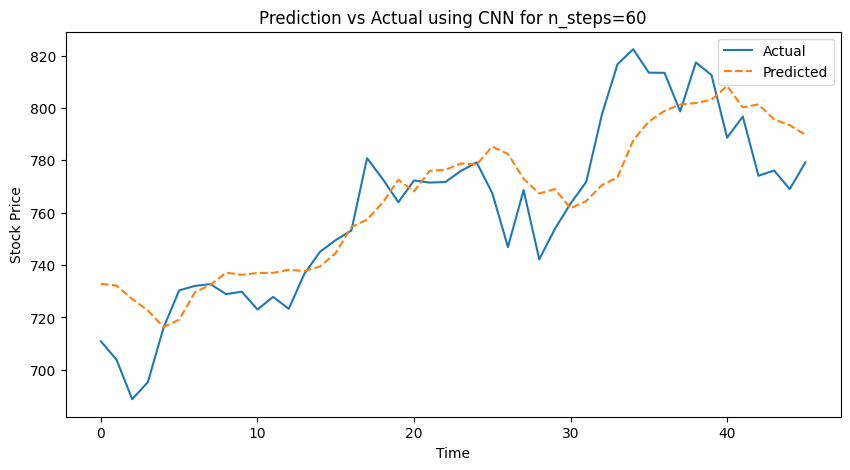

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step

 Evaluating CNN for stock: HDFC 
Testing for n_steps = 60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
RMSE for n_steps=60: 37.23730247701207
MAPE for n_steps=60: 1.5959327559103433%


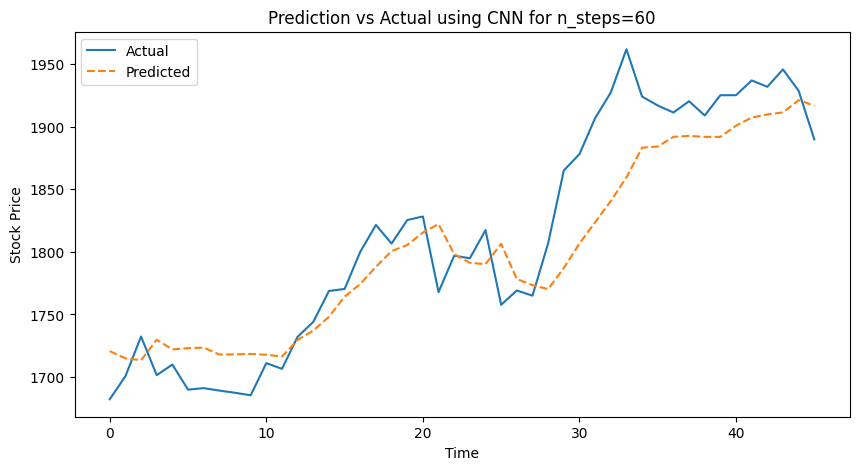

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step

 Evaluating CNN for stock: ICICI
Testing for n_steps = 60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
RMSE for n_steps=60: 44.93009631583115
MAPE for n_steps=60: 3.013967125046515%


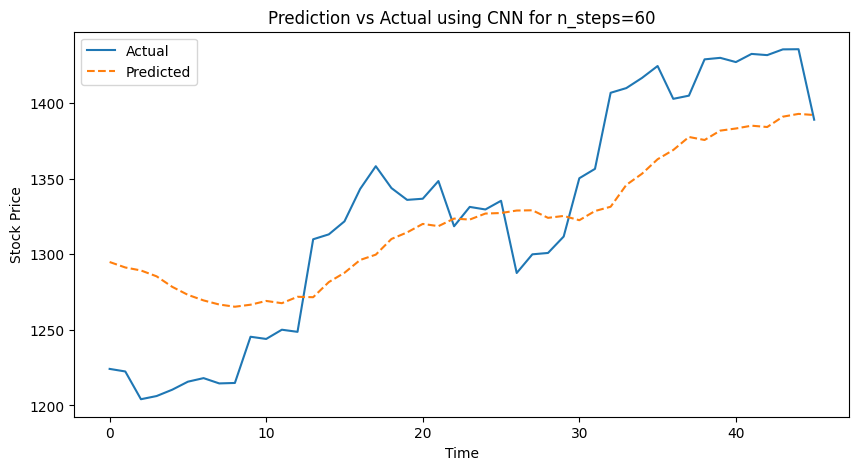

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step

 Evaluating CNN for stock: Kotak
Testing for n_steps = 60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
RMSE for n_steps=60: 58.918661416469256
MAPE for n_steps=60: 2.3512294310823543%


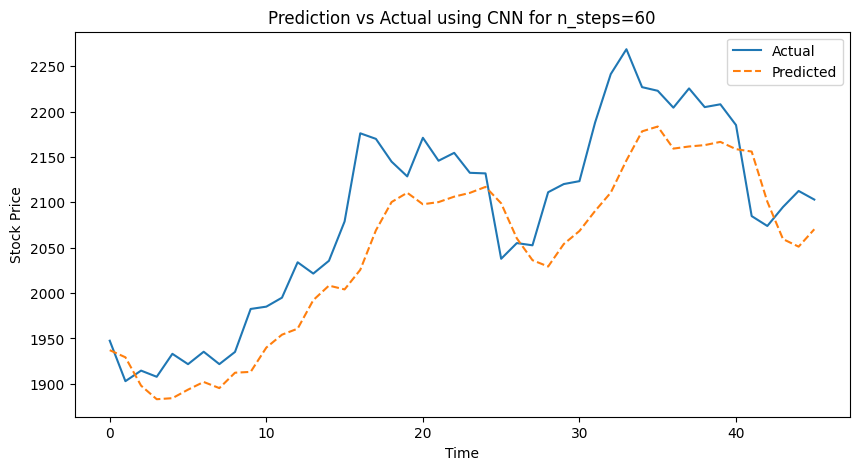

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step

 Evaluating CNN for stock: Axis
Testing for n_steps = 60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
RMSE for n_steps=60: 34.7212891522742
MAPE for n_steps=60: 2.229797239641256%


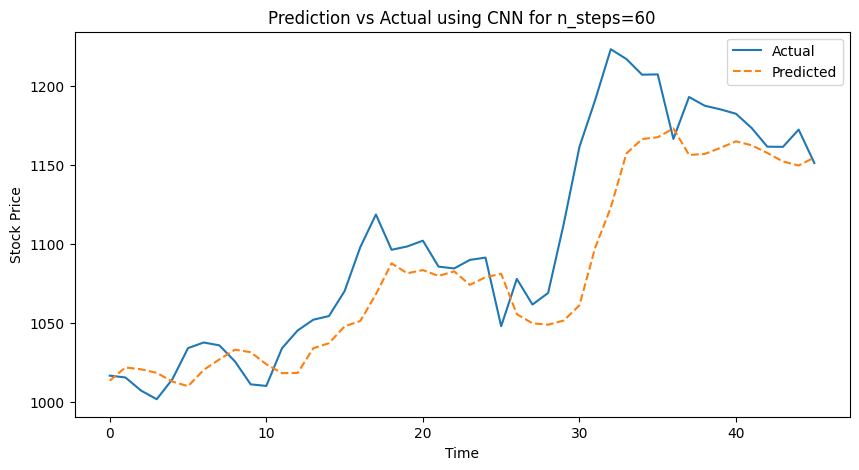

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step

 CNN Evaluation Results:
SBIN - RMSE: 17.753554131443423, MAPE: 1.805581498963286%, Predictions for May 12th & 13th: [np.float32(789.5789), np.float32(789.0045)]
HDFC  - RMSE: 37.23730247701207, MAPE: 1.5959327559103433%, Predictions for May 12th & 13th: [np.float32(1907.2175), np.float32(1903.415)]
ICICI - RMSE: 44.93009631583115, MAPE: 3.013967125046515%, Predictions for May 12th & 13th: [np.float32(1393.8685), np.float32(1393.2881)]
Kotak - RMSE: 58.918661416469256, MAPE: 2.3512294310823543%, Predictions for May 12th & 13th: [np.float32(2065.1292), np.float32(2050.4917)]
Axis - RMSE: 34.7212891522742, MAPE: 2.229797239641256%, Predictions for May 12th & 13th: [np.float32(1152.133), np.float32(1146.8022)]


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.metrics import mean_squared_error
from math import sqrt
import tensorflow as tf
import matplotlib.pyplot as plt

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Define a function to prepare the data
def prepare_data(data, n_steps):
    X, y = [], []
    for i in range(n_steps, len(data)):
        X.append(data[i-n_steps:i, 0])  # n_steps previous values
        y.append(data[i, 0])  # current value
    return np.array(X), np.array(y)

# Function to evaluate CNN model for n_steps = 60
def evaluate_cnn(train_Bank, test_Bank, n_steps=60):
    print(f"Testing for n_steps = {n_steps}")

    # Prepare data for CNN
    scaler = MinMaxScaler(feature_range=(0, 1))
    train_scaled = scaler.fit_transform(train_Bank.values.reshape(-1, 1))
    test_scaled = scaler.transform(test_Bank.values.reshape(-1, 1))

    X_train, y_train = prepare_data(train_scaled, n_steps)
    X_test, y_test = prepare_data(test_scaled, n_steps)

    # Reshape input data for CNN [samples, time steps, features]
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

    # Build CNN model
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_steps, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    # Predict using the trained model
    y_pred = model.predict(X_test, batch_size=32)
    y_pred_rescaled = scaler.inverse_transform(y_pred)
    y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Evaluate performance
    rmse = sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))
    mape = np.mean(np.abs((y_test_rescaled - y_pred_rescaled) / y_test_rescaled)) * 100

    print(f"RMSE for n_steps={n_steps}: {rmse}")
    print(f"MAPE for n_steps={n_steps}: {mape}%")

    # Diagnostic Plots
    # Prediction vs Actual Plot
    plt.figure(figsize=(10, 5))
    plt.plot(y_test_rescaled, label="Actual")
    plt.plot(y_pred_rescaled, label="Predicted", linestyle="--")
    plt.title(f"Prediction vs Actual using CNN for n_steps={n_steps}")
    plt.xlabel("Time")
    plt.ylabel("Stock Price")
    plt.legend()
    plt.show()

    # Predict for May 12th and May 13th, 2025
    last_data = test_Bank[-n_steps:].values  # Last n_steps from test data
    last_data_scaled = scaler.transform(last_data.reshape(-1, 1))  # Scale the last n_steps data

    # Predict the next two days
    predictions = []
    for _ in range(2):  # Predicting two days (May 12th and May 13th)
        input_data = last_data_scaled.reshape(1, n_steps, 1)
        next_pred = model.predict(input_data)
        next_pred_rescaled = scaler.inverse_transform(next_pred)
        predictions.append(next_pred_rescaled[0, 0])  # Append the prediction

        # Update the last_data for the next prediction
        last_data_scaled = np.append(last_data_scaled[1:], next_pred, axis=0)

    # Return predictions for the next two days
    return rmse, mape, predictions

# Assuming train_Bank is a DataFrame with stock data (e.g., columns 'SBIN', 'HDFC', etc.)
stocks = train_Bank.columns  # Get all stock names (columns) from the train_Bank DataFrame

results = {}

# Loop over each stock in train_Bank
for stock in stocks:
    print(f"\n Evaluating CNN for stock: {stock}")
    # Apply the evaluate_cnn function for each stock
    rmse, mape, predictions = evaluate_cnn(train_Bank[stock], test_Bank[stock], n_steps=60)

    # Store results
    results[stock] = {'RMSE': rmse, 'MAPE': mape, 'Predictions for May 12th & 13th': predictions}

# Print all results
print("\n CNN Evaluation Results:")
for stock, metrics in results.items():
    print(f"{stock} - RMSE: {metrics['RMSE']}, MAPE: {metrics['MAPE']}%, Predictions for May 12th & 13th: {metrics['Predictions for May 12th & 13th']}")



 Evaluating CNN for stock: SBIN
Testing for n_steps = 60


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


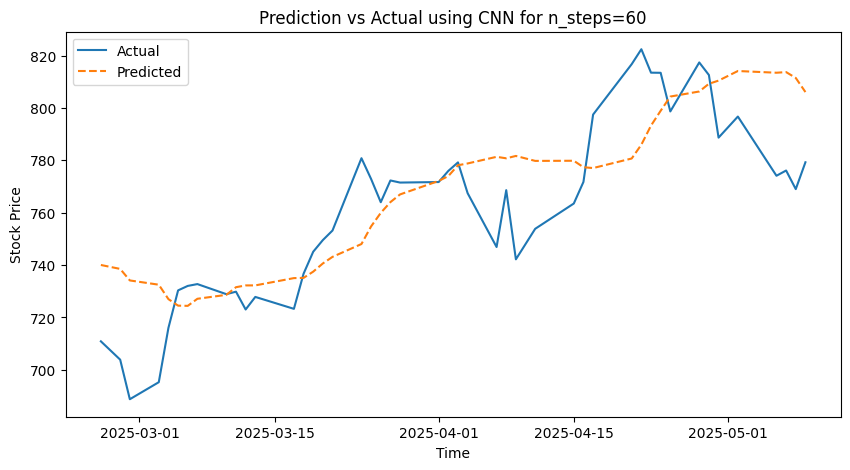


 Evaluating CNN for stock: HDFC 
Testing for n_steps = 60


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


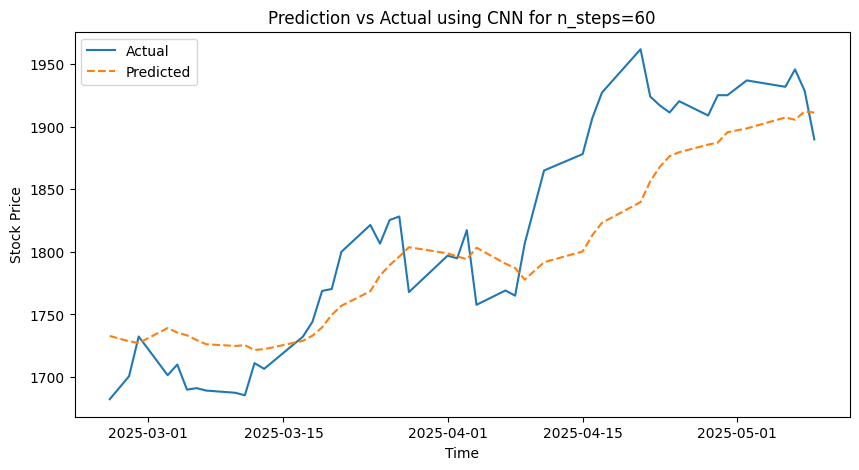


 Evaluating CNN for stock: ICICI
Testing for n_steps = 60


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


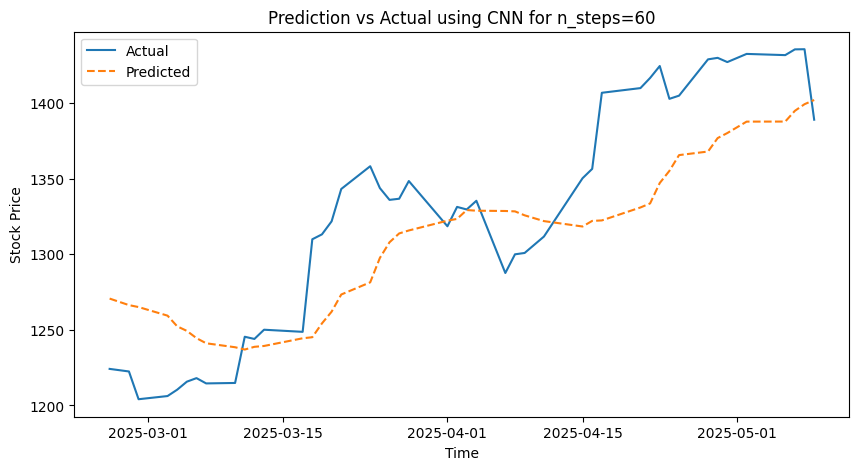


 Evaluating CNN for stock: Kotak
Testing for n_steps = 60


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


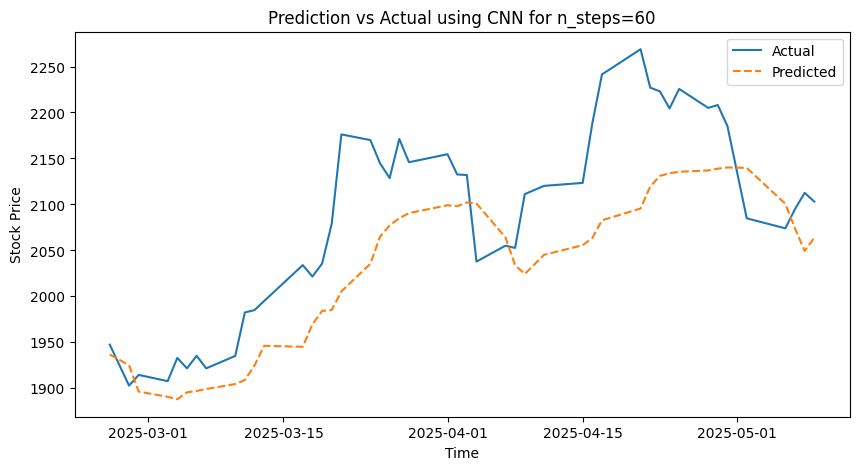


 Evaluating CNN for stock: Axis
Testing for n_steps = 60


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


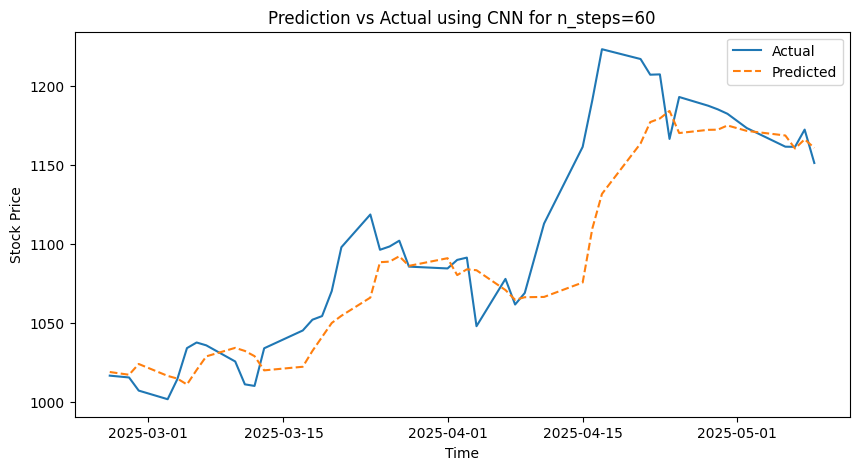

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.metrics import mean_squared_error
from math import sqrt
import tensorflow as tf
import matplotlib.pyplot as plt

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Define a function to prepare the data
def prepare_data(data, n_steps):
    X, y = [], []
    for i in range(n_steps, len(data)):
        X.append(data[i-n_steps:i, 0])  # n_steps previous values
        y.append(data[i, 0])  # current value
    return np.array(X), np.array(y)

# Function to evaluate CNN model for n_steps = 60
def evaluate_cnn(train_Bank, test_Bank, n_steps=60):
    print(f"Testing for n_steps = {n_steps}")

    # Prepare data for CNN
    scaler = MinMaxScaler(feature_range=(0, 1))
    train_scaled = scaler.fit_transform(train_Bank.values.reshape(-1, 1))
    test_scaled = scaler.transform(test_Bank.values.reshape(-1, 1))

    X_train, y_train = prepare_data(train_scaled, n_steps)
    X_test, y_test = prepare_data(test_scaled, n_steps)

    # Reshape input data for CNN [samples, time steps, features]
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

    # Build CNN model
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_steps, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    # Predict using the trained model
    y_pred = model.predict(X_test, batch_size=32)
    y_pred_rescaled = scaler.inverse_transform(y_pred)
    y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Diagnostic Plots
    # Prediction vs Actual Plot
    plt.figure(figsize=(10, 5))
    plt.plot(test_Bank.index[n_steps:],y_test_rescaled, label="Actual")
    plt.plot(test_Bank.index[n_steps:],y_pred_rescaled, label="Predicted", linestyle="--")
    plt.title(f"Prediction vs Actual using CNN for n_steps={n_steps}")
    plt.xlabel("Time")
    plt.ylabel("Stock Price")
    plt.legend()
    plt.show()

    return

# Assuming train_Bank is a DataFrame with stock data (e.g., columns 'SBIN', 'HDFC', etc.)
stocks = train_Bank.columns  # Get all stock names (columns) from the train_Bank DataFrame


# Loop over each stock in train_Bank
for stock in stocks:
    print(f"\n Evaluating CNN for stock: {stock}")
    # Apply the evaluate_cnn function for each stock
    evaluate_cnn(train_Bank[stock], test_Bank[stock], n_steps=60)

In [ ]:
# Example stock prices (maximum values or current values in your case)
stock_prices = {
    'SBIN': 754.80,
    'HDFC': 1194.00,
    'ICICI': 1151.50,
    'Kotak': 1170.55,
    'Axis': 1014.15
}

# Actual RMSE values for LSTM model
lstm_rmse_values = {
    'SBIN': 20.94,
    'HDFC': 39.19,
    'ICICI': 35.83,
    'Kotak': 66.43,
    'Axis': 56.71
}

# Actual RMSE values for CNN model
cnn_rmse_values = {
    'SBIN': 17.75,
    'HDFC': 37.24,
    'ICICI': 44.93,
    'Kotak': 58.92,
    'Axis': 34.72
}

# Function to calculate Relative RMSE
def calculate_relative_rmse(rmse_values, stock_prices):
    return {stock: (rmse / stock_prices[stock]) * 100 for stock, rmse in rmse_values.items()}

# Calculate Relative RMSE for LSTM and CNN models
lstm_relative_rmse = calculate_relative_rmse(lstm_rmse_values, stock_prices)
cnn_relative_rmse = calculate_relative_rmse(cnn_rmse_values, stock_prices)

# Display the results for both models
print("Relative RMSE for LSTM Model:")
for stock, r_rmse in lstm_relative_rmse.items():
    print(f'{stock} - {r_rmse:.2f}%')

print("\nRelative RMSE for CNN Model:")
for stock, r_rmse in cnn_relative_rmse.items():
    print(f'{stock} - {r_rmse:.2f}%')

Relative RMSE for LSTM Model:
SBIN - 2.77%
HDFC - 3.28%
ICICI - 3.11%
Kotak - 5.68%
Axis - 5.59%

Relative RMSE for CNN Model:
SBIN - 2.35%
HDFC - 3.12%
ICICI - 3.90%
Kotak - 5.03%
Axis - 3.42%


***Using the above results, LSTM model is used to predict the future values of ICICI Bank Stock values while CNN model is used for the rest.***

# Volatality Analysis

In [ ]:
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 12.2 MB/s eta 0:00:00


In [ ]:
import warnings
warnings.filterwarnings('ignore')


🔍 Volatility Analysis for SBIN


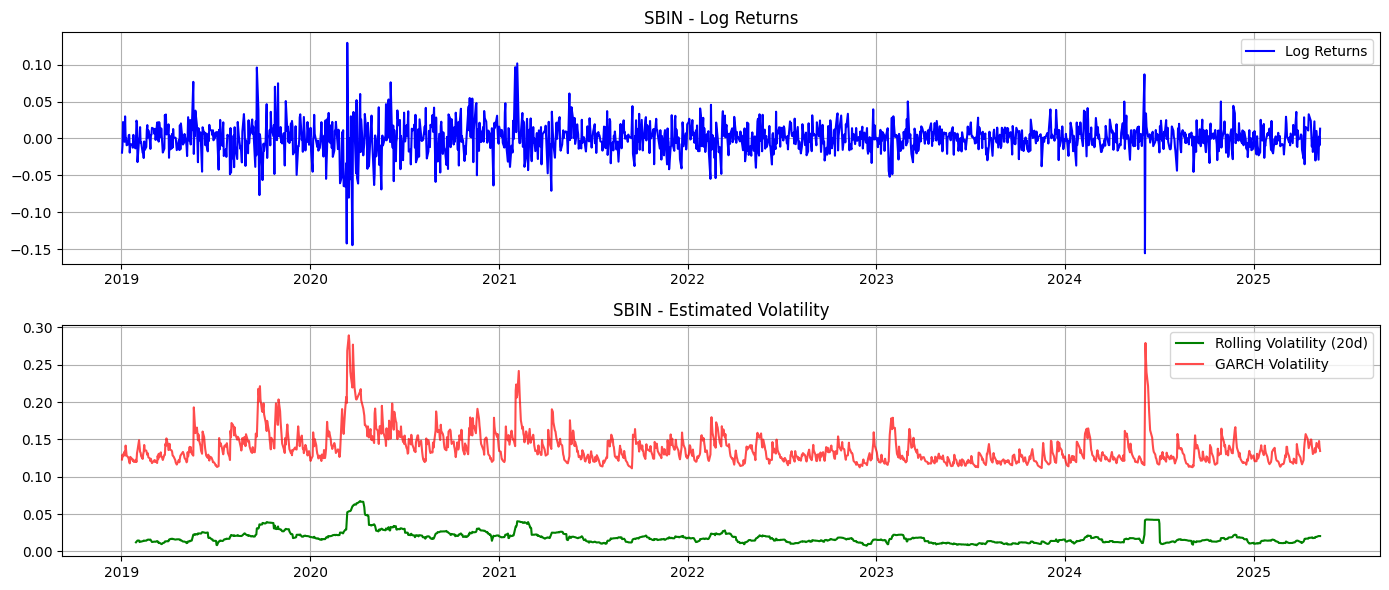


🔍 Volatility Analysis for HDFC 


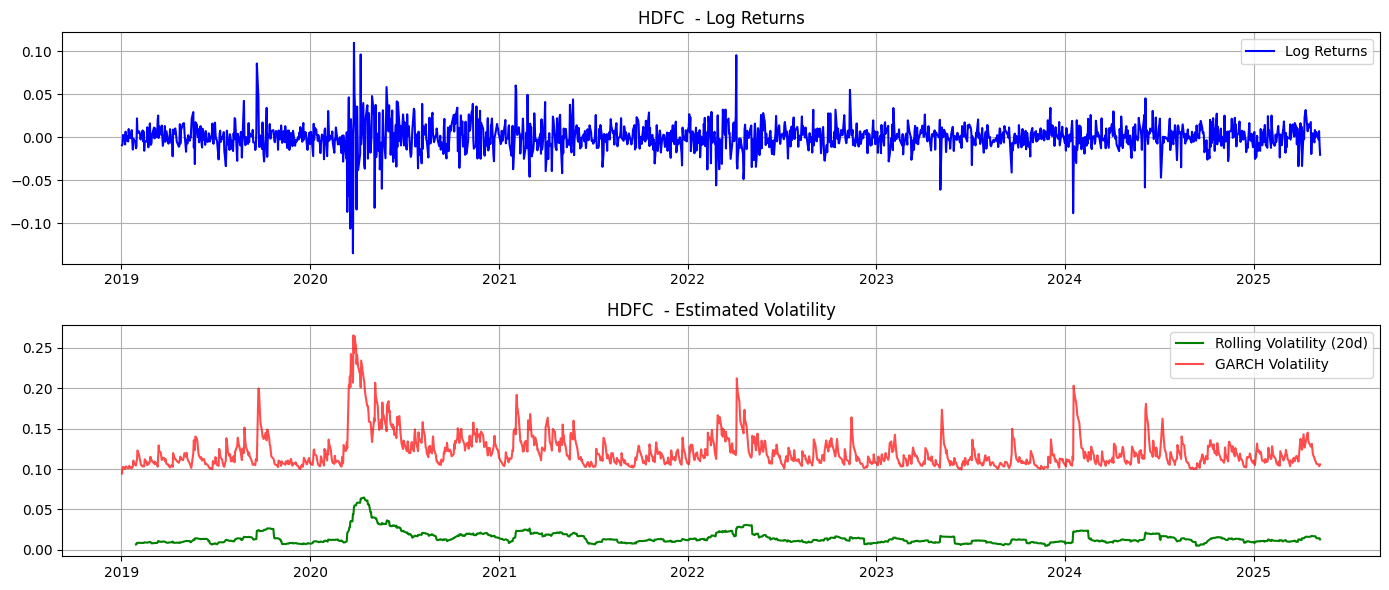


🔍 Volatility Analysis for ICICI


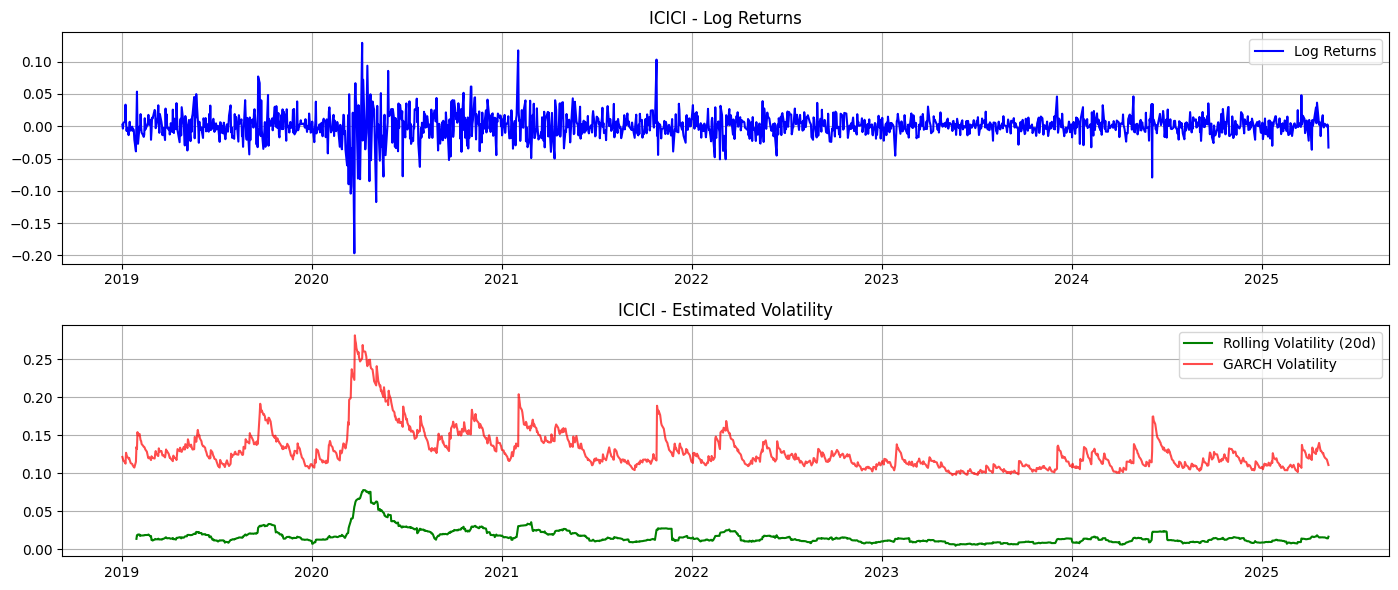


🔍 Volatility Analysis for Kotak


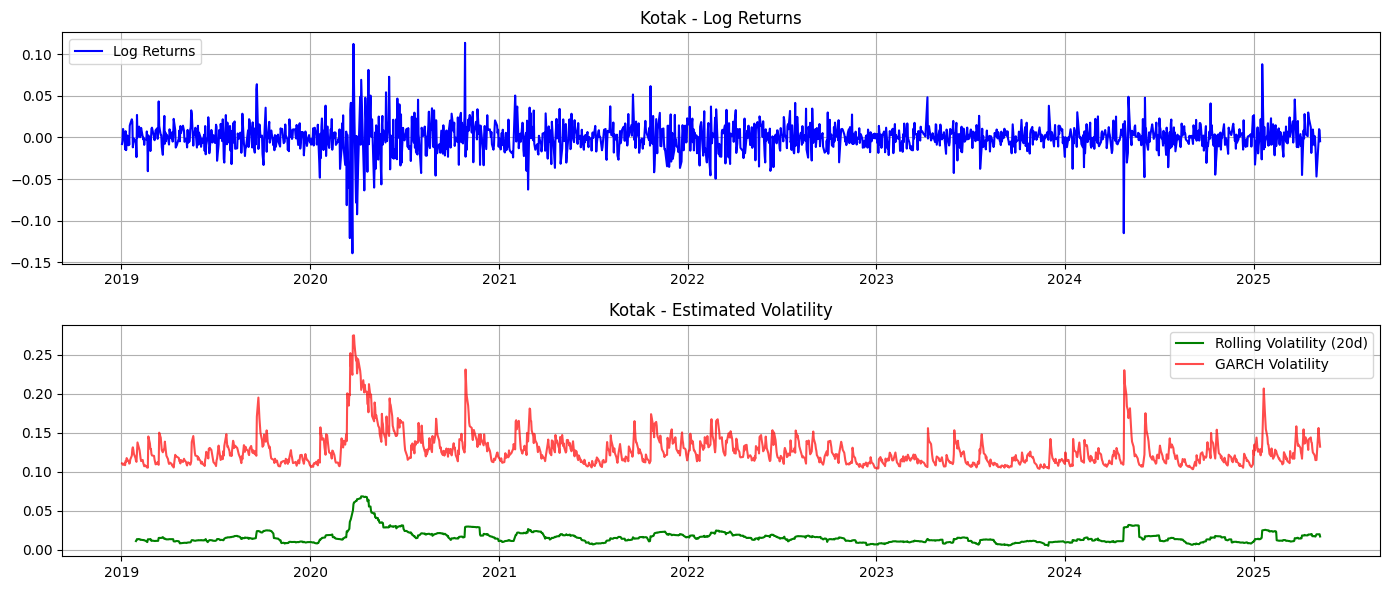


🔍 Volatility Analysis for Axis


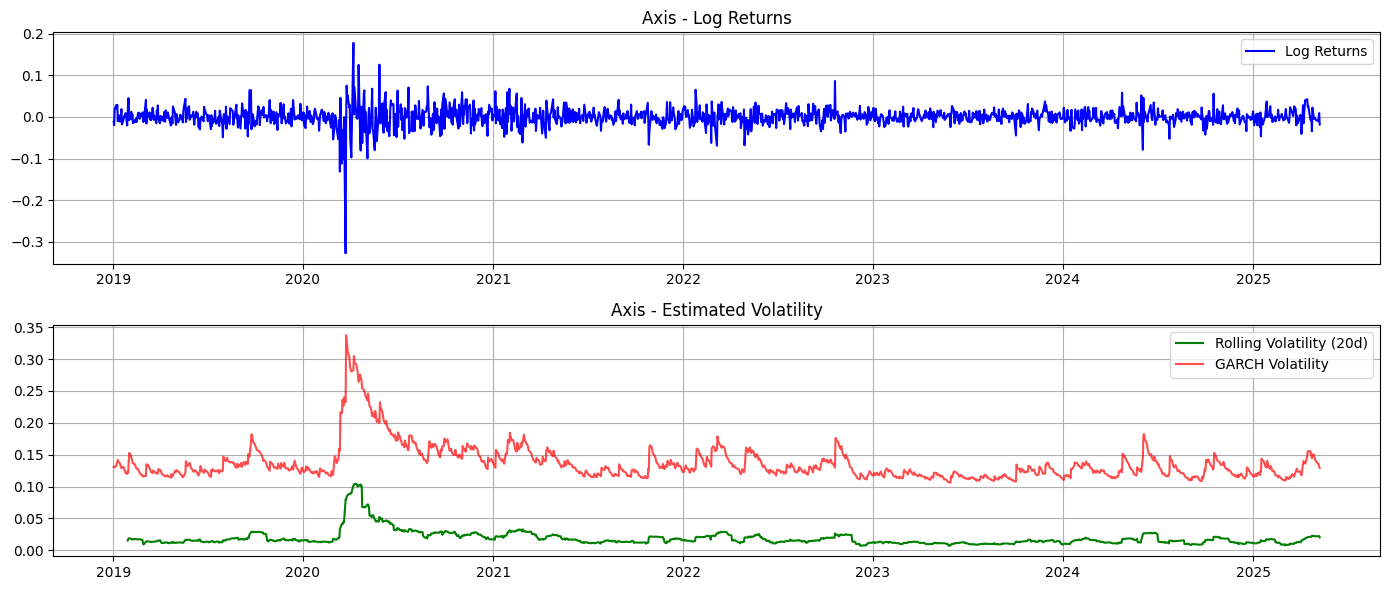

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model

# Loop through each stock in the Bank DataFrame
for stock in Bank.columns:
    print(f"\n🔍 Volatility Analysis for {stock}")

    # Step 1: Compute log returns
    price_series = Bank[stock].dropna()
    log_returns = np.log(price_series / price_series.shift(1)).dropna()

    # Step 2: Rolling volatility (20-day window)
    rolling_volatility = log_returns.rolling(window=20).std()

    # Step 3: GARCH(1,1) model
    garch_model = arch_model(log_returns, vol='Garch', p=1, q=1)
    garch_result = garch_model.fit(disp='off')
    garch_volatility = np.sqrt(garch_result.conditional_volatility)
    # Plotting log returns and volatility estimates
    plt.figure(figsize=(14, 6))
    plt.subplot(2, 1, 1)
    plt.plot(log_returns, color='blue', label='Log Returns')
    plt.title(f"{stock} - Log Returns")
    plt.grid(True)
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(rolling_volatility, label='Rolling Volatility (20d)', color='green')
    plt.plot(garch_volatility, label='GARCH Volatility', color='red', alpha=0.7)
    plt.title(f"{stock} - Estimated Volatility")
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

***It can be seen that the volatility between 2020 and 2021 is quite high which can be due to COVID-19 pandemic.***

In [ ]:
from arch import arch_model

# Dictionary to store the volatility forecasts
volatility_forecasts = {}

# Loop through each stock in the Bank DataFrame
for stock in Bank.columns:
    print(f"\n🔍 Forecasting Volatility for {stock}")

    # Step 1: Compute log returns (up to May 9th)
    price_series = Bank[stock].dropna()
    log_returns = np.log(price_series / price_series.shift(1)).dropna()

    # Step 2: Fit GARCH(1,1) model
    garch_model = arch_model(log_returns, vol='Garch', p=1, q=1)
    garch_result = garch_model.fit(disp='off')

    # Step 3: Forecast volatility for May 12th and May 13th (from May 9th data)
    forecast = garch_result.forecast(horizon=2)  # Forecast for 2 days (May 12, May 13)
    variance_forecast = forecast.variance.iloc[-1]  # last available forecast
    volatility_forecast = np.sqrt(variance_forecast)  # convert variance to std dev

    # Get the forecasted volatility for May 9th from the GARCH result
    may_9_volatility = np.sqrt(garch_result.conditional_volatility[-1])  # last value

    # Store the forecast (May 9th is already available in the dataset)
    volatility_forecasts[stock] = {
        'May 9': may_9_volatility,  # Volatility for May 9 (GARCH result)
        'May 12': volatility_forecast[0],  # Volatility for May 12
        'May 13': volatility_forecast[1]   # Volatility for May 13
    }

    # Print forecasted volatilities
    print(f"📅 May 9 Volatility: {may_9_volatility:.6f}")  # Using GARCH result for May 9th
    print(f"📅 May 12 Volatility: {volatility_forecast[0]:.6f}")
    print(f"📅 May 13 Volatility: {volatility_forecast[1]:.6f}")

# Optional: Convert to DataFrame for easy viewing
vol_df = pd.DataFrame(volatility_forecasts).T
vol_df.columns = ['May 9 Volatility', 'May 12 Volatility', 'May 13 Volatility']
print("\n📊 Volatility Forecast Summary:")
print(vol_df)


🔍 Forecasting Volatility for SBIN
📅 May 9 Volatility: 0.134547
📅 May 12 Volatility: 0.017435
📅 May 13 Volatility: 0.017796

🔍 Forecasting Volatility for HDFC 
📅 May 9 Volatility: 0.105767
📅 May 12 Volatility: 0.014128
📅 May 13 Volatility: 0.014366

🔍 Forecasting Volatility for ICICI
📅 May 9 Volatility: 0.110991
📅 May 12 Volatility: 0.016179
📅 May 13 Volatility: 0.016260

🔍 Forecasting Volatility for Kotak
📅 May 9 Volatility: 0.132206
📅 May 12 Volatility: 0.015803
📅 May 13 Volatility: 0.016024

🔍 Forecasting Volatility for Axis
📅 May 9 Volatility: 0.129243
📅 May 12 Volatility: 0.017036
📅 May 13 Volatility: 0.017138

📊 Volatility Forecast Summary:
       May 9 Volatility  May 12 Volatility  May 13 Volatility
SBIN           0.134547           0.017435           0.017796
HDFC           0.105767           0.014128           0.014366
ICICI          0.110991           0.016179           0.016260
Kotak          0.132206           0.015803           0.016024
Axis           0.129243           0

# Final Weight Calculation for Capital allocation

## Weight calculation by Forecast-Guided Allocation Method

In [ ]:
import numpy as np
import pandas as pd

# Example data (use actual values for your dataset)
# Predicted prices for May 12th and May 13th
predictions = {
    'SBIN': [789.5789, 789.0045],
    'HDFC': [1907.2175, 1903.415],
    'Kotak': [2065.1292, 2050.4917],
    'Axis': [1152.133, 1146.8022],
    'ICICI': [1457.4586, 1464.8635]
}

# RMSE values for each stock (from CNN evaluation)
rmse_values = {
    'SBIN': 17.753554131443423,
    'HDFC': 37.23730247701207,
    'Kotak': 58.918661416469256,
    'Axis': 34.7212891522742,
    'ICICI': 35.834289287102365
}

# Latest prices for May 9th (from your dataset)
latest_prices = {
    'SBIN': 774.38,
    'Axis': 1137.01,
    'Kotak': 2081.49,
    'ICICI': 1374.11,
    'HDFC':1865.26
}

# Calculate Gain, Confidence, and Score for each stock
scores = {}
for stock in predictions:
    forecast_12 = predictions[stock][0]  # Forecast for May 12th
    forecast_13 = predictions[stock][1]  # Forecast for May 13th
    current_price = latest_prices[stock]
    rmse = rmse_values[stock]

    # Calculate Gain (forecast - current price)
    gain_12 = forecast_12 - current_price  # Gain for May 12th
    gain_13 = forecast_13 - forecast_12 # Gain for May 13th

    # Calculate Confidence (inverse of RMSE)
    confidence_12 = 1 / rmse  # Confidence for May 12th
    confidence_13 = 1 / rmse  # Confidence for May 13th

    # Calculate Score (Gain * Confidence)
    score_12 = gain_12 * confidence_12  # Score for May 12th
    score_13 = gain_13 * confidence_13  # Score for May 13th

    # Store the scores
    scores[stock] = {
        'Score May 12': score_12,
        'Score May 13': score_13,
        'Total Score': score_12 + score_13  # Combine the scores for both days
    }

# Create a DataFrame for easy viewing
score_df = pd.DataFrame(scores).T
score_df['Total Score'] = score_df['Score May 12'] + score_df['Score May 13']
print("\n📊 Stock Scores Summary:")
print(score_df)



📊 Stock Scores Summary:
       Score May 12  Score May 13  Total Score
SBIN       0.856105     -0.032354     0.823751
HDFC       1.126760     -0.102115     1.024645
Kotak     -0.277685     -0.248436    -0.526120
Axis       0.435554     -0.153531     0.282023
ICICI      2.325945      0.206643     2.532588


## Weight calculation by Volatility-Aware Sizing

In [ ]:
# Volatility data for May 12th (based on your forecast)
volatility_forecasts = {
    'SBIN': 0.017435,  # May 12th volatility for SBIN
    'HDFC': 0.014128,  # May 12th volatility for HDFC
    'ICICI': 0.016179,  # May 12th volatility for ICICI
    'Kotak': 0.015803,  # May 12th volatility for Kotak
    'Axis': 0.017036   # May 12th volatility for Axis
}

# Step 1: Calculate inverse volatility for each stock
inverse_volatility_weights = {}
for stock, volatility in volatility_forecasts.items():
    inverse_volatility_weights[stock] = 1 / volatility

# Step 2: Normalize the weights so that they sum to 1
total_inverse_volatility = sum(inverse_volatility_weights.values())
normalized_volatility_weights = {stock: weight / total_inverse_volatility for stock, weight in inverse_volatility_weights.items()}

# Step 3: Create a DataFrame to display the results
volatility_weight_df = pd.DataFrame(list(normalized_volatility_weights.items()), columns=['Stock', 'Weight_Volatility'])
volatility_weight_df.set_index('Stock', inplace=True)

# Print the results
print("\n📊 Normalized Volatility-based Weights (for May 12th):")
print(volatility_weight_df)


📊 Normalized Volatility-based Weights (for May 12th):
       Weight_Volatility
Stock                   
SBIN            0.183878
HDFC            0.226919
ICICI           0.198152
Kotak           0.202867
Axis            0.188184


## Final Weights

In [ ]:
import pandas as pd

# Assuming you have the following data
expected_gain_12 = {
    'SBIN': 0.856105,
    'HDFC': 1.126760,
    'Kotak': -0.277685,
    'Axis': 0.435554,
    'ICICI': 2.325945
}

expected_gain_13 = {
    'SBIN': -0.032354,
    'HDFC': -0.102115,
    'Kotak': -0.248436,
    'Axis': -0.153531,
    'ICICI': 0.206643
}

volatility_weights = {
    'SBIN': 0.183878,
    'HDFC': 0.226919,
    'ICICI': 0.198152,
    'Kotak': 0.202867,
    'Axis': 0.188184
}

# Assign weights to each component based on their importance (adjustable)
alpha = 0.35  # Weight for May 12th expected gain
beta = 0.35   # Weight for May 13th expected gain
gamma = 0.3  # Weight for volatility score

# Calculate the combined score for each stock
combined_scores = {}
for stock in expected_gain_12.keys():
    combined_scores[stock] = (
        alpha * expected_gain_12[stock] +
        beta * expected_gain_13[stock] -
        gamma * volatility_weights[stock]
    )

# Convert to DataFrame for easy manipulation
score_df = pd.DataFrame(list(combined_scores.items()), columns=['Stock', 'Combined Score'])

# Normalize the combined scores to sum to 1
total_score = score_df['Combined Score'].abs().sum()
score_df['Normalized Score'] = (score_df['Combined Score'] / total_score).abs()

# Print the results
print(score_df)

   Stock  Combined Score  Normalized Score
0   SBIN        0.233149          0.142345
1   HDFC        0.290550          0.177390
2  Kotak       -0.245002          0.149582
3   Axis        0.042253          0.025797
4  ICICI        0.826960          0.504886


# Analysis on May 13th with actual values of Stock prices of May 12th

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
import tensorflow as tf

# Set random seeds
np.random.seed(42)
tf.random.set_seed(42)

# Function to prepare input sequences
def prepare_data(data, n_steps):
    X, y = [], []
    for i in range(n_steps, len(data)):
        X.append(data[i-n_steps:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Forecasting function using actual May 12 and computing RMSE
def forecast_may13_with_rmse(train_data, test_data, actual_may12, n_steps=60):
    # Scale data
    scaler = MinMaxScaler()
    train_scaled = scaler.fit_transform(train_data.values.reshape(-1, 1))
    test_scaled = scaler.transform(test_data.values.reshape(-1, 1))

    # Replace last test value (May 12) with actual value
    test_scaled[-1] = scaler.transform([[actual_may12]])

    # Prepare training sequences
    X_train, y_train = prepare_data(train_scaled, n_steps)
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

    # Prepare test sequences
    X_test, y_test = prepare_data(test_scaled, n_steps)
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

    # Build CNN model
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_steps, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    # Predict May 13 using actual May 12
    last_window = test_data[-(n_steps - 1):].copy().values.flatten().tolist()
    last_window.append(actual_may12)
    last_window = last_window[-n_steps:]  # ensure size = n_steps

    # Scale and reshape
    last_scaled = scaler.transform(np.array(last_window).reshape(-1, 1))
    input_seq = last_scaled.reshape(1, n_steps, 1)

    # Predict May 13
    pred_scaled = model.predict(input_seq)
    pred_may13 = scaler.inverse_transform(pred_scaled)[0][0]

    # Compute RMSE on test set
    y_pred = model.predict(X_test)
    y_pred_inv = scaler.inverse_transform(y_pred)
    y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
    rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))

    return pred_may13, rmse

# --- Forecast Loop for All Stocks ---

# Actual May 12 stock prices (remove trailing spaces in keys!)
may12_actuals = {
    'SBIN': 790.11,
    'HDFC': 1927.33,
    'Kotak': 2128.16,
    'Axis': 1192.36,
    'ICICI': 1433.26
}

results = {}

# Forecast for each stock
for stock in train_Bank.columns:
    stock_clean = stock.strip()  # Fix mismatched keys like 'HDFC '
    print(f"\nForecasting May 13 for stock: {stock_clean}")

    train_data = train_Bank[stock]
    test_data = test_Bank[stock]
    actual_12 = may12_actuals[stock_clean]  # use cleaned key

    pred_13, rmse = forecast_may13_with_rmse(train_data, test_data, actual_12, n_steps=60)

    results[stock_clean] = {
        'Predicted May 13': pred_13,
        'RMSE': rmse
    }

# Print forecasts and RMSEs
print("\nCNN Forecasts for May 13 (using actual May 12):")
for stock, metrics in results.items():
    print(f"{stock} - Predicted May 13: {metrics['Predicted May 13']:.2f}, RMSE: {metrics['RMSE']:.4f}")


Forecasting May 13 for stock: SBIN


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step

Forecasting May 13 for stock: HDFC


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step

Forecasting May 13 for stock: ICICI


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

Forecasting May 13 for stock: Kotak


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step

Forecasting May 13 for stock: Axis


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step

CNN Forecasts for May 13 (using actual May 12):
SBIN - Predicted May 13: 801.84, RMSE: 21.6274
HDFC - Predicted May 13: 1879.86, RMSE: 53.8493
ICICI - Predicted May 13: 1389.64, RMSE: 52.3308
Kotak - Predicted May 13: 2110.28, RMSE: 61.0961
Axis - Predicted May 13: 1180.02, RMSE: 31.5404


In [ ]:
# Actual May 12 stock prices
may12_actuals = {
    'SBIN': 790.11,
    'HDFC': 1927.33,
    'Kotak': 2128.16,
    'Axis': 1192.36,
    'ICICI': 1433.26
}

# Predicted May 13 values from your model
predictions_may13 = {
    'SBIN': 801.84,
    'HDFC': 1879.86,
    'Kotak': 2110.28,
    'Axis': 1180.02,
    'ICICI': 1389.64
}

# Calculate Expected Gain for each stock
expected_gains = {}
for stock in predictions_may13:
    actual_price = may12_actuals[stock]
    predicted_price = predictions_may13[stock]

    expected_gain = ((predicted_price - actual_price) / actual_price) * 100
    expected_gains[stock] = expected_gain

# Print the expected gains
print("\nExpected Gain for May 13 based on Predictions:")
for stock, gain in expected_gains.items():
    print(f"{stock} - Expected Gain: {gain:.2f}%")


Expected Gain for May 13 based on Predictions:
SBIN - Expected Gain: 1.48%
HDFC - Expected Gain: -2.46%
Kotak - Expected Gain: -0.84%
Axis - Expected Gain: -1.03%
ICICI - Expected Gain: -3.04%
